# Common methods of Data Analisys (Python)
## Practical Statistics for Data Scientists
### Chapter 1. Exploratory Data Analysis

Import required Python packages.

In [1]:
%matplotlib inline

from pathlib import Path

import math
import numpy as np
import pandas as pd

import scipy.stats as st
from scipy import stats


from statsmodels import robust
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats
from statsmodels.stats import power
from statsmodels.stats import anova

import wquantiles
import sklearn

import seaborn as sns
import matplotlib.pylab as plt
from plotnine import ggplot, geom_point, geom_smooth, aes, stat_smooth, facet_wrap

print("Imports Done!")

Imports Done!


Define paths to data sets. If you don't keep your data in the same directory as the code, adapt the path names.

In [2]:
DATA = "~/PycharmProjects/Datasets/"
mtcar_path = DATA + "mtcars.csv"
mtcar = pd.read_csv(mtcar_path)

In [3]:
mtcar.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
mtcar.shape

(32, 12)

In [5]:
mtcar.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [6]:
mtcar_df = mtcar.copy()

In [7]:
mtcar_df = mtcar_df.rename(columns={"Unnamed: 0" : "Car Model"})

In [8]:
mtcar_df["vs"] = mtcar_df["vs"].replace({0 : "V", 1 : "S"})

In [9]:
mtcar_df["am"] = mtcar_df["am"].replace({0 : "Auto", 1 : "Manual"})

In [10]:
result = mtcar_df["qsec"][(mtcar_df["cyl"] != 3) & (mtcar_df["mpg"] > 20)].mean()
result

18.81642857142857

In [11]:
mtcar_df.groupby(["vs", "am"]).agg({"hp" : "mean"})

hp
vs am                
S  Auto    102.142857
   Manual   80.571429
V  Auto    194.166667
   Manual  180.833333

In [12]:
mtcar_df.groupby("am").agg("median")

,mpg,cyl,disp,hp,drat,wt,qsec,gear,carb
am,,,,,,,,,
Auto,17.3,8,275.8,175,3.15,3.52,17.82,3,3
Manual,22.8,4,120.3,109,4.08,2.32,17.02,4,2


In [13]:
mtcar_df.groupby("am").agg("median")

,mpg,cyl,disp,hp,drat,wt,qsec,gear,carb
am,,,,,,,,,
Auto,17.3,8,275.8,175,3.15,3.52,17.82,3,3
Manual,22.8,4,120.3,109,4.08,2.32,17.02,4,2


In [14]:
mtcar_df.groupby(["am", "vs"]).agg("std").iloc[:,[0,2]]

mpg       disp
am     vs                     
Auto   S   2.471071  49.130725
       V   2.774396  71.823494
Manual S   4.757701  18.802128
       V   4.008865  95.233616

In [15]:
my_stats = mtcar_df.groupby(["am", "vs"]).agg("std").iloc[:,[0,2]]

In [16]:
descriptions_stat = mtcar_df.groupby(["am"]).agg("std").loc[:, ["hp", "disp"]]
descriptions_stat

,hp,disp
am,,
Auto,53.908196,110.171647
Manual,84.062324,87.203989


In [17]:
round(mtcar_df.groupby(["am", "vs"]).agg({"qsec" : ["count", "min", "max", "mean", "std", "sem"]}), 2)

qsec                                 
          count    min    max   mean   std   sem
am     vs                                       
Auto   S      7  18.30  22.90  19.97  1.46  0.55
       V     12  15.41  18.00  17.14  0.80  0.23
Manual S      7  16.90  19.90  18.70  0.95  0.36
       V      6  14.50  17.02  15.80  1.09  0.45

In [18]:
mtcar_df.isna().sum()

Car Model    0
mpg          0
cyl          0
disp         0
hp           0
drat         0
wt           0
qsec         0
vs           0
am           0
gear         0
carb         0
dtype: int64

Dealing with NA 

In [19]:
# mtcar_df.head(15)

In [20]:
# mtcar_df["mpg"].mean()

In [21]:
# mtcar_df["mpg"].iloc[1:10] = None

In [22]:
# mtcar_df.head(15)

In [23]:
# mtcar_df["mpg"].mean()

<AxesSubplot:xlabel='mpg', ylabel='Count'>

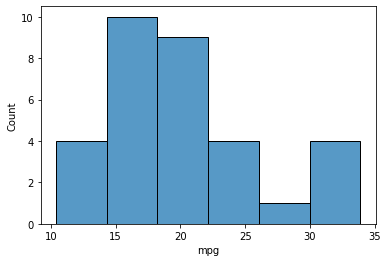

In [24]:
sns.histplot(mtcar_df["mpg"])

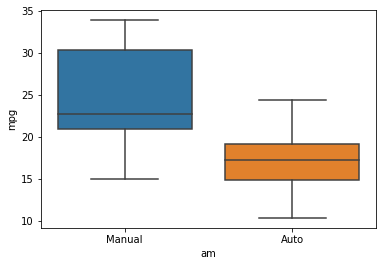

In [25]:
ax = sns.boxplot(x="am", y="mpg", data=mtcar_df)

<AxesSubplot:xlabel='mpg', ylabel='hp'>

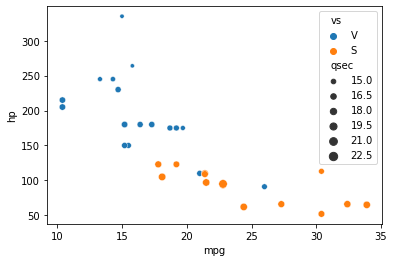

In [26]:
sns.scatterplot(data=mtcar_df, x="mpg", y="hp", hue="vs", size= "qsec")

<AxesSubplot:xlabel='mpg', ylabel='disp'>

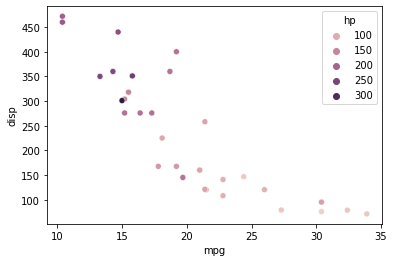

In [27]:
sns.scatterplot(data=mtcar_df, x="mpg", y="disp", hue="hp")

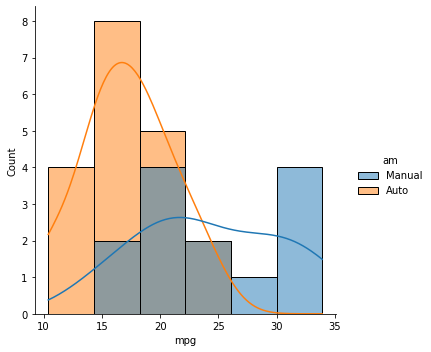

In [28]:
sns.displot(data=mtcar_df, x="mpg", hue="am", kde=True)

In [29]:
mtcar_df.head()

,Car Model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,V,Manual,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,V,Manual,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,S,Manual,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,S,Auto,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,V,Auto,3,2


In [30]:
d = mtcar_df.groupby(["vs", "am"])["am"].count().unstack()
d

am,Auto,Manual
vs,,
S,7,7
V,12,6


In [31]:
p_value = st.fisher_exact(d)[1]
p_value

0.47269744160178034

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kendalltau.html#scipy.stats.kendalltau

In [32]:
st.pearsonr(mtcar_df["mpg"], mtcar_df["hp"])[0]

-0.7761683718265864

In [33]:
# Расчёт степеней свободы для переменных и доверительного интервала для коэффициента корреляции Пирсона

def stdev(X):
    m = X.mean()
    return math.sqrt(sum((x-m)**2 for x in X) / len(X))

def degreesOfFreedom(X, Y):
    s1 = (stdev(X)**2)
    s2 = (stdev(Y)**2)
    df = (s1 / len(X) + s2 / len(Y))**2 / ((s1 / len(X))**2 / (len(X) - 1) + (s2 / len(Y))**2 / (len(Y) - 1))
    return(df)

def r_to_z(r):
    return math.log((1 + r) / (1 - r)) / 2.0

def z_to_r(z):
    e = math.exp(2 * z)
    return((e - 1) / (e + 1))

def r_confidence_interval(r, alpha, n):
    z = r_to_z(r)
    se = 1.0 / math.sqrt(n - 3)
    z_crit = stats.norm.ppf((1 + alpha)/2)  # 2-tailed z critical value

    lo = z - z_crit * se
    hi = z + z_crit * se

    # Return a sequence
    return (z_to_r(lo), z_to_r(hi))

https://stackoverflow.com/questions/33176049/how-do-you-compute-the-confidence-interval-for-pearsons-r-in-python

https://stackoverflow.com/questions/49473757/python-degrees-of-freedom

https://stepik.org/lesson/11508/step/2?unit=2531

In [34]:
print('Degrees of freedom for Student-t distribution: ' + str(degreesOfFreedom(mtcar_df["mpg"], mtcar_df["hp"])))

Degrees of freedom for Student-t distribution: 31.479052044115537


In [35]:
r_confidence_interval(st.pearsonr(mtcar_df["mpg"], mtcar_df["hp"])[0], .95, 31.479)

(-0.8859833417042168, -0.5839195529962159)

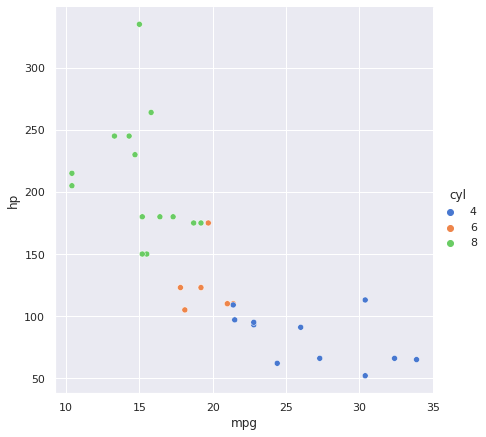

In [36]:
sns.set_theme(style="darkgrid")
sns.relplot(x="mpg", y="hp", hue="cyl", palette="muted", height=6, data=mtcar_df)

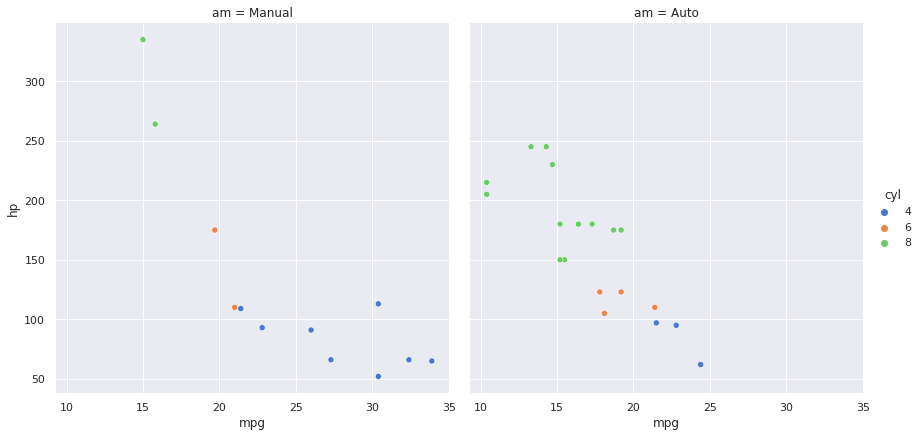

In [37]:
sns.set_theme(style="darkgrid")
sns.relplot(x="mpg", y="hp", hue="cyl", palette="muted", col="am", height=6, data=mtcar_df)

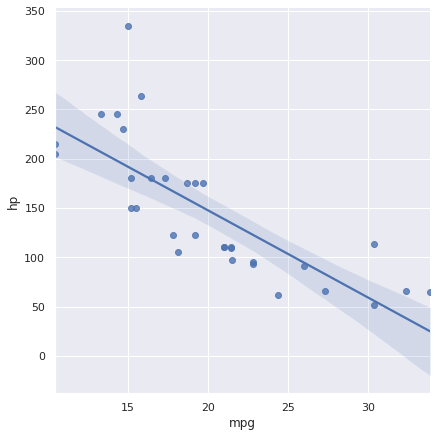

In [38]:
sns.lmplot(x="mpg", y="hp", palette="muted", height=6, data=mtcar_df)

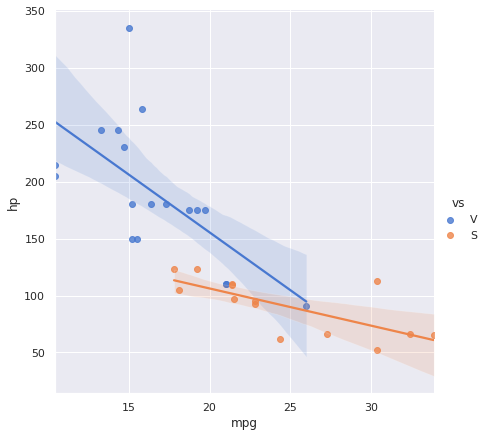

In [39]:
sns.lmplot(x="mpg", y="hp", palette="muted", hue="vs", height=6, data=mtcar_df)

In [40]:
mtcar_df.head()

,Car Model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,V,Manual,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,V,Manual,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,S,Manual,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,S,Auto,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,V,Auto,3,2


array([[<AxesSubplot:xlabel='mpg', ylabel='mpg'>,
        <AxesSubplot:xlabel='disp', ylabel='mpg'>,
        <AxesSubplot:xlabel='hp', ylabel='mpg'>,
        <AxesSubplot:xlabel='drat', ylabel='mpg'>,
        <AxesSubplot:xlabel='wt', ylabel='mpg'>,
        <AxesSubplot:xlabel='qsec', ylabel='mpg'>],
       [<AxesSubplot:xlabel='mpg', ylabel='disp'>,
        <AxesSubplot:xlabel='disp', ylabel='disp'>,
        <AxesSubplot:xlabel='hp', ylabel='disp'>,
        <AxesSubplot:xlabel='drat', ylabel='disp'>,
        <AxesSubplot:xlabel='wt', ylabel='disp'>,
        <AxesSubplot:xlabel='qsec', ylabel='disp'>],
       [<AxesSubplot:xlabel='mpg', ylabel='hp'>,
        <AxesSubplot:xlabel='disp', ylabel='hp'>,
        <AxesSubplot:xlabel='hp', ylabel='hp'>,
        <AxesSubplot:xlabel='drat', ylabel='hp'>,
        <AxesSubplot:xlabel='wt', ylabel='hp'>,
        <AxesSubplot:xlabel='qsec', ylabel='hp'>],
       [<AxesSubplot:xlabel='mpg', ylabel='drat'>,
        <AxesSubplot:xlabel='disp', ylabel=

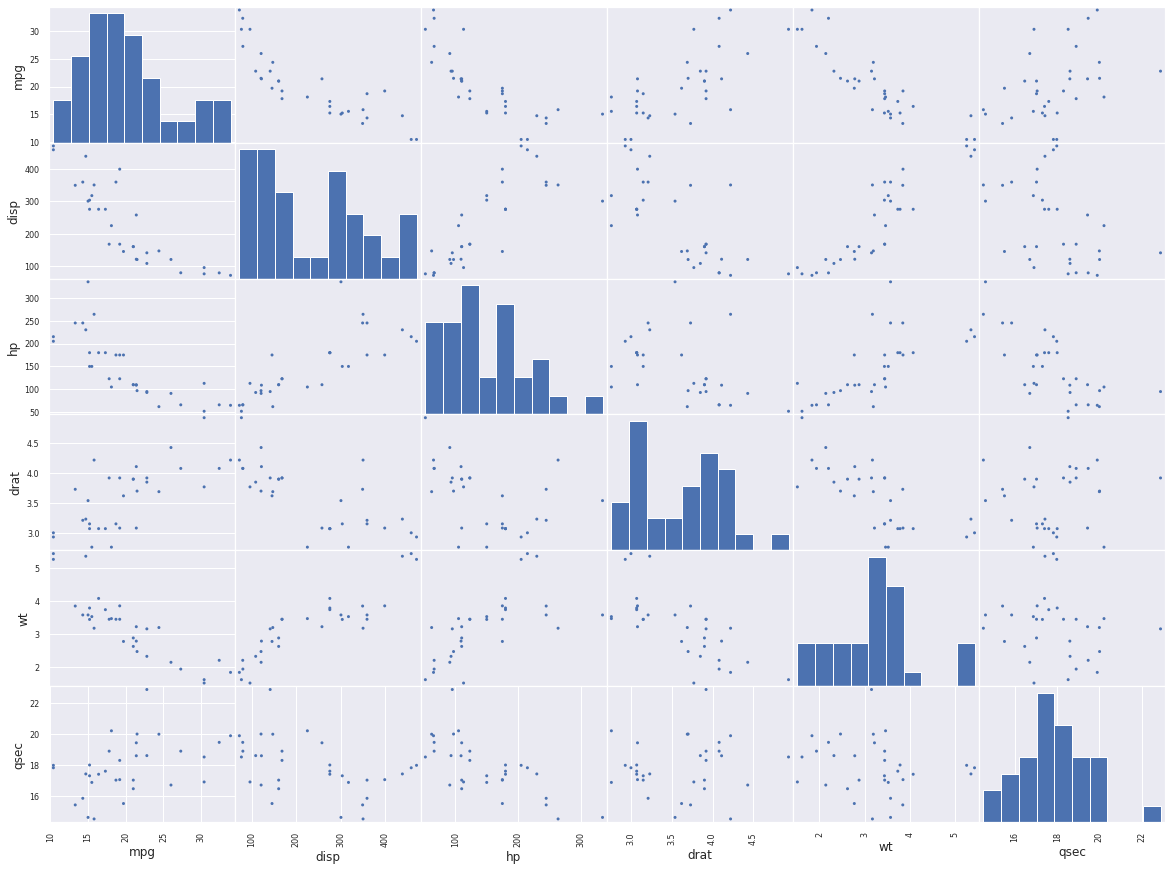

In [41]:
pd.plotting.scatter_matrix(mtcar_df[["mpg", "disp", "hp", "drat", "wt", "qsec"]], alpha=1, figsize=(20,15))

In [42]:
model_lm = sm.OLS(mtcar_df["mpg"], pd.get_dummies(mtcar_df["cyl"]))
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html

res = model_lm.fit()

print(res.params)
print(res.summary())

4    26.663636
6    19.742857
8    15.100000
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     39.70
Date:                Tue, 10 Nov 2020   Prob (F-statistic):           4.98e-09
Time:                        18:47:49   Log-Likelihood:                -81.282
No. Observations:                  32   AIC:                             168.6
Df Residuals:                      29   BIC:                             173.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

In [43]:
mtcar_df.cyl.factorize()

(array([0, 0, 1, 0, 2, 0, 2, 1, 1, 0, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2,
        2, 2, 2, 1, 1, 1, 2, 0, 2, 1]),
 Int64Index([6, 4, 8], dtype='int64'))

In [44]:
mtcar_df.cyl = mtcar_df.cyl.factorize()[0]
mtcar_df.head()

,Car Model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,0,160.0,110,3.90,2.620,16.46,V,Manual,4,4
1,Mazda RX4 Wag,21.0,0,160.0,110,3.90,2.875,17.02,V,Manual,4,4
2,Datsun 710,22.8,1,108.0,93,3.85,2.320,18.61,S,Manual,4,1
3,Hornet 4 Drive,21.4,0,258.0,110,3.08,3.215,19.44,S,Auto,3,1
4,Hornet Sportabout,18.7,2,360.0,175,3.15,3.440,17.02,V,Auto,3,2


In [45]:
model_lm = smf.ols("mpg ~ cyl", mtcar_df)

res = model_lm.fit()

print(res.params)
print(res.summary())

Intercept    24.312039
cyl          -3.463724
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     7.851
Date:                Tue, 10 Nov 2020   Prob (F-statistic):            0.00881
Time:                        18:47:49   Log-Likelihood:                -98.658
No. Observations:                  32   AIC:                             201.3
Df Residuals:                      30   BIC:                             204.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

In [46]:
model_mtcars = smf.ols("mpg ~ wt * am", mtcar_df)

res = model_mtcars.fit()

print(res.params)
print("---------------")
print(res.summary())
print("---------------")
print(res.conf_int())

Intercept          31.416055
am[T.Manual]       14.878423
wt                 -3.785908
wt:am[T.Manual]    -5.298360
dtype: float64
---------------
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     46.57
Date:                Tue, 10 Nov 2020   Prob (F-statistic):           5.21e-11
Time:                        18:47:49   Log-Likelihood:                -73.738
No. Observations:                  32   AIC:                             155.5
Df Residuals:                      28   BIC:                             161.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|    

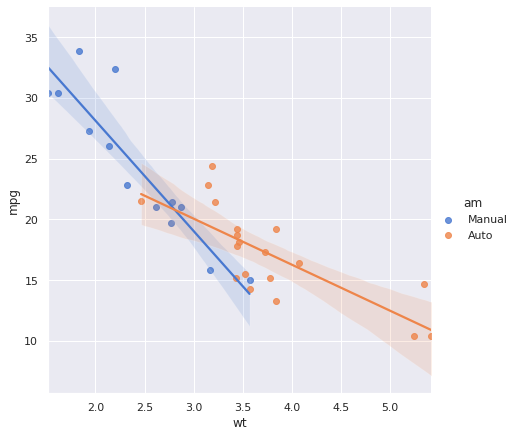

In [47]:
sns.lmplot(x="wt", y="mpg", hue="am", palette="muted", height=6, data=mtcar_df)

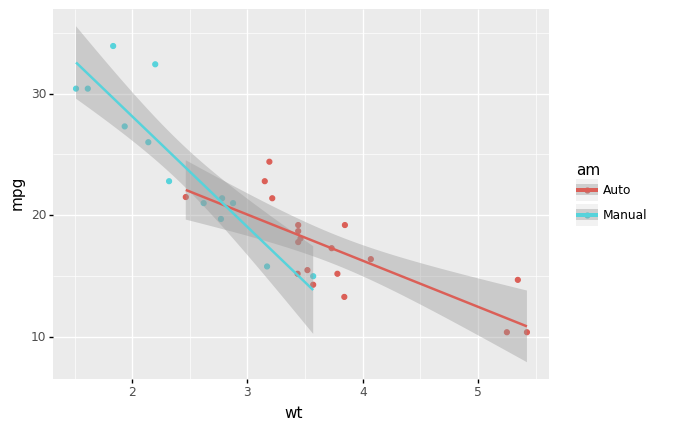

<ggplot: (8735222191276)>

In [48]:
(ggplot(mtcar_df, aes(x='wt', y='mpg', color="am"))
    + geom_point()
    + geom_smooth(method='lm'))

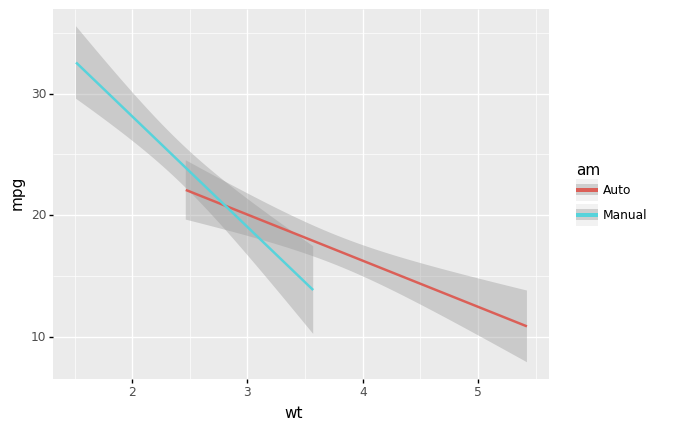

<ggplot: (8735222570942)>

In [49]:
(ggplot(mtcar_df, aes(x='wt', y='mpg', color="am"))
    + geom_smooth(method='lm'))

In [50]:
# https://stepik.org/lesson/11508/step/5?unit=2531
# import pandas as pd
# import scipy.stats as st

# def corr_comp(data_frame: pd.DataFrame) -> tuple:
#     """Computing Pearson correlation coefficient and p-value for testing non-correlation.
#     """
#     return st.pearsonr(data_frame.iloc[:, 0], data_frame.iloc[:, 1])

# test_df = mtcar_df.iloc[:, [1,5]]
# corr_comp(test_df)

### NEW DATASET

In [51]:
nucleotides = pd.read_csv("https://stepic.org/media/attachments/course/524/test_data.csv")
nucleotides.head()

,V1,V2,V3
0,C,A,C
1,G,G,A
2,C,C,C
3,T,T,A
4,G,T,A


In [52]:
nucleotides.describe()

,V1,V2,V3
count,30,30,30
unique,4,4,4
top,G,G,A
freq,10,10,11


In [53]:
v1_vc = nucleotides["V1"].value_counts()
v2_vc = nucleotides["V2"].value_counts()
v3_vc = nucleotides["V3"].value_counts()
[v1_vc, v2_vc, v3_vc]

[G    10
 T     7
 C     7
 A     6
 Name: V1, dtype: int64,
 G    10
 C     9
 A     6
 T     5
 Name: V2, dtype: int64,
 A    11
 T     9
 G     6
 C     4
 Name: V3, dtype: int64]

In [54]:
st.chisquare(v1_vc)

Power_divergenceResult(statistic=1.2, pvalue=0.753004311656458)

In [55]:
# import pandas as pd
# import scipy.stats as st

# def smart_test(x: pd.DataFrame) -> list: 
#     """ Performing a Fisher exact test on input contingency table 
#         if at least one cell contains less than 5 observations. 
#         Else performing a one-way Chi-square test.
    
#     Parameters
#     ----------
#     x: pd.DataFrame
#         Input pd.DataFrame with some numeric data.
    
#     Returns
#     -------
#         Returns p-value if performing a Fisher exact test. 
#         If performing a one-way chi-square test returns:
#         chi-square test statistic, p-value of the test and degrees of freedom.
#     """

#     return st.fisher_exact(x)[1] if (x < 5).any().any() else [*st.chi2_contingency(x)[0:3]]

# # Примеры датафреймов для проведения тестов:
# df_1 = pd.DataFrame([[12, 7], [6, 7]])
# df_2 = pd.DataFrame([[8, 6], [2, 4]])

# # Пример запуска функции с тестовым датафреймом:
# smart_test(df_1)

In [56]:
# pd.pivot_table(data=df_1, columns=df_1.columns)

In [57]:
# Пытки-попытки!
# df_3 = pd.DataFrame([[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1], 
#                      [0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1]]).T

# # df_3
# pd.pivot_table(data=df_3, values=df_3.columns)

In [58]:
# # Примеры датафреймов для проведения тестов:
# df_1 = pd.DataFrame([[12, 7], [6, 7]])
# df_2 = pd.DataFrame([[8, 6], [2, 4]])

# # Пример запуска функции с тестовым датафреймом:
# smart_test(df_1)

In [59]:
# help(smart_test)

In [60]:
# Предполагается, что Вы уже скачали необходимый датасет и знаете путь до него
# import pandas as pd
# import scipy.stats

# mtcar_path = PATH_TO_DATA + "mtcars.csv"
# mtcar = pd.read_csv(mtcar_path)
# d = mtcar.groupby(["vs", "am"])["am"].count().unstack()
# p_value = scipy.stats.fisher_exact(d)[1]

### NEW DATASET 

In [61]:
DATA = "~/PycharmProjects/Datasets/"
airquality_path = DATA + "airquality.csv"
airquality = pd.read_csv(airquality_path)

In [62]:
airquality = airquality.drop("Unnamed: 0", axis=1)

In [63]:
airquality.head(10)

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5
5,28.0,NaN,14.9,66,5,6
6,23.0,299.0,8.6,65,5,7
7,19.0,99.0,13.8,59,5,8
8,8.0,19.0,20.1,61,5,9
9,NaN,194.0,8.6,69,5,10


In [64]:
airquality_df = airquality.copy()

In [65]:
airquality_df.loc[airquality_df.Month >= 7]
# ИЛИ
airquality_df.query("Month >= 7")

,Ozone,Solar.R,Wind,Temp,Month,Day
61,135.0,269.0,4.1,84,7,1
62,49.0,248.0,9.2,85,7,2
63,32.0,236.0,9.2,81,7,3
64,NaN,101.0,10.9,84,7,4
65,64.0,175.0,4.6,83,7,5
...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26
149,NaN,145.0,13.2,77,9,27
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29


In [66]:
aq_ss = airquality_df.query("Month >= 7")

In [67]:
aq_ss.groupby("Month").agg({"Ozone" : "count"})
# ИЛИ 
# airquality_df.query("Month >= 7").groupby("Month").agg({"Ozone" : "count"})

,Ozone
Month,
7,26
8,26
9,29


<AxesSubplot:xlabel='Month', ylabel='Ozone'>

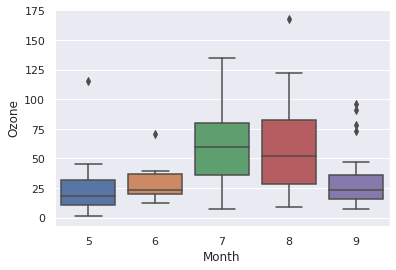

In [68]:
sns.boxplot(x="Month", y="Ozone", data=airquality_df)

### NEW DATASET

In [69]:
DATA = "~/PycharmProjects/Datasets/"
iris_path = DATA + "iris.csv"
iris = pd.read_csv(iris_path, index_col=0)

In [70]:
iris.head(10)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa
10,4.9,3.1,1.5,0.1,setosa


In [71]:
iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [72]:
iris.agg("std")

Sepal.Length    0.828066
Sepal.Width     0.435866
Petal.Length    1.765298
Petal.Width     0.762238
dtype: float64

In [73]:
iris[iris.Species == "virginica"].median().sort_values(ascending=False)

Sepal.Length    6.50
Petal.Length    5.55
Sepal.Width     3.00
Petal.Width     2.00
dtype: float64

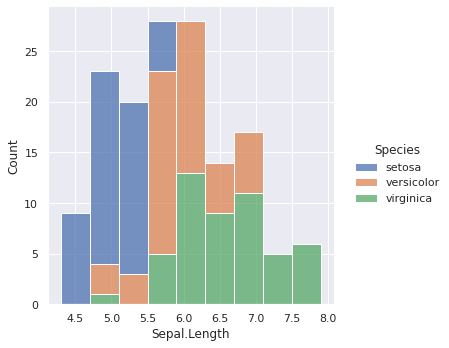

In [74]:
sns.displot(data=iris, x="Sepal.Length", hue="Species", multiple="stack")

In [75]:
iris_df = iris[iris.Species != "setosa"]

<AxesSubplot:xlabel='Sepal.Length', ylabel='Count'>

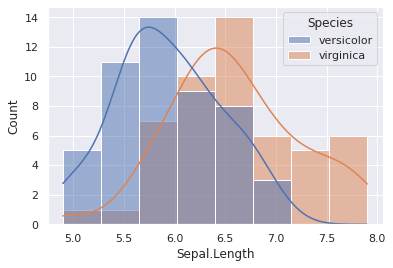

In [76]:
sns.histplot(iris_df, x="Sepal.Length", kde=True, hue="Species")

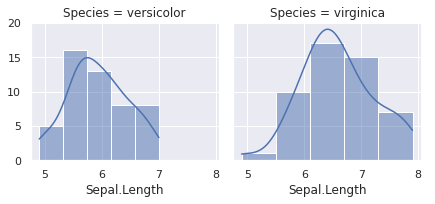

In [77]:
g = sns.FacetGrid(iris_df, col="Species")
g.map(sns.histplot, "Sepal.Length", kde=True, bins=5)
g.add_legend()

https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid - IMBA

<AxesSubplot:xlabel='Sepal.Length', ylabel='Count'>

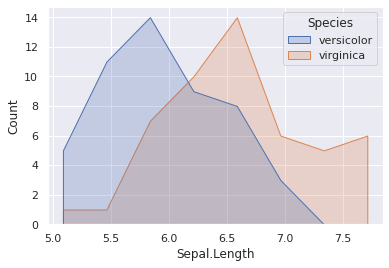

In [78]:
sns.histplot(iris_df, x="Sepal.Length", hue="Species", element="poly") 

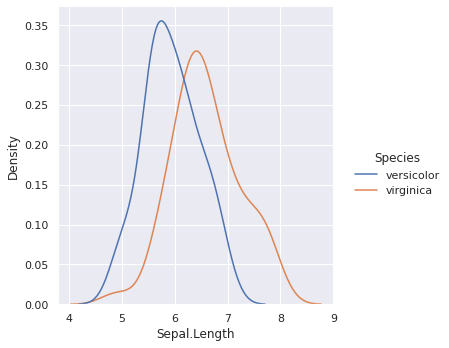

In [79]:
sns.displot(iris_df, x="Sepal.Length", hue="Species", kind="kde")

<AxesSubplot:xlabel='Sepal.Length', ylabel='Density'>

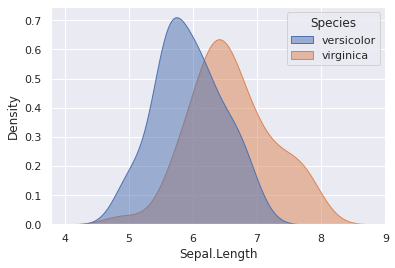

In [80]:
sns.kdeplot(data=iris_df, x="Sepal.Length", hue="Species", fill=True, common_norm=False, alpha=.5, linewidth=1)

<AxesSubplot:xlabel='Species', ylabel='Sepal.Length'>

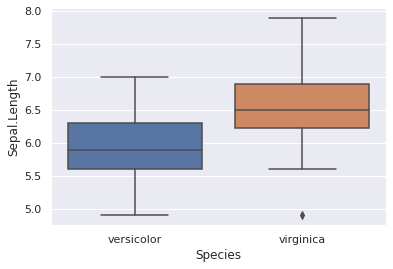

In [81]:
sns.set_theme(style="darkgrid")
sns.boxplot(y="Sepal.Length", x="Species", data=iris_df)

In [82]:
# Perform the Shapiro-Wilk test for normality.
shapiro_test = stats.shapiro(iris_df["Sepal.Length"])
shapiro_test

ShapiroResult(statistic=0.9805403351783752, pvalue=0.1464301496744156)

In [83]:
shapiro_test_1 = stats.shapiro(iris_df[iris_df.Species == "versicolor"]["Sepal.Length"])
shapiro_test_2 = stats.shapiro(iris_df[iris_df.Species == "virginica"]["Sepal.Length"])
[shapiro_test_1, shapiro_test_2]

[ShapiroResult(statistic=0.9778355956077576, pvalue=0.46473264694213867),
 ShapiroResult(statistic=0.9711798429489136, pvalue=0.25832483172416687)]

In [84]:
# Perform Bartlett’s test for equal variances.
# Гомогенность дисперсии проверяем, короче.
stat, p = st.bartlett(iris_df[iris_df.Species == "virginica"]["Sepal.Length"], 
                               iris_df[iris_df.Species == "versicolor"]["Sepal.Length"])
print("The test statistic is {}. \nThe p-value of the test is {}.".format(stat, p))

The test statistic is 2.094933311010139. 
The p-value of the test is 0.14778816016231236.


In [85]:
# Calculate the T-test for the means of two independent samples of scores.
t_test = st.ttest_ind(iris_df[iris_df.Species == "virginica"]["Sepal.Length"], 
                               iris_df[iris_df.Species == "versicolor"]["Sepal.Length"]) #, equal_var=True
t_test

Ttest_indResult(statistic=5.629165259719801, pvalue=1.7248563024547942e-07)

In [86]:
# Проверяем гипотезу о том, что среднее значение длины чашелистика в генеральной совокупности (датасете) равно 8.
# Для этого используем одновыборочный Т-тест. 
t_test = st.ttest_1samp(iris_df["Sepal.Length"], 8) 
t_test

Ttest_1sampResult(statistic=-26.22072564309469, pvalue=2.3864526432268e-46)

Как и следовало ожидать - нет, среднее значение "Sepal.Length" не равно 8.

In [87]:
import numpy as np
import scipy.stats

# Самописная фукнция с просторов интернета, которая вычисляет доверительный интервал. Полезно!
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [88]:
mean_confidence_interval(iris_df["Sepal.Length"])

(6.2620000000000005, 6.130479266795949, 6.393520733204052)

In [89]:
# Расчёт доверительных интервалов
import numpy as np, scipy.stats as st

a = iris_df[iris_df.Species == "versicolor"]["Sepal.Length"]
b = iris_df[iris_df.Species == "virginica"]["Sepal.Length"]

print(st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)),
      st.t.interval(0.95, len(b)-1, loc=np.mean(b), scale=st.sem(b)))
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html?highlight=scipy%20stats%20t#scipy.stats.t

(5.789305783299542, 6.082694216700458) (6.4072850193549105, 6.768714980645086)


In [90]:
print(mean_confidence_interval(a),
      mean_confidence_interval(b))

(5.936, 5.789305783299542, 6.082694216700458) (6.587999999999998, 6.4072850193549105, 6.768714980645086)


Вывод - самописная функция повторяет метод .interval из библиотеки scipy.

Отлично!

In [91]:
print(a.quantile([0.05, 0.95]), "\n\n",
      b.quantile([0.05, 0.95]))
print("\n\n")
print(iris_df["Sepal.Length"].quantile([0.05, 0.95]))

0.05    5.045
0.95    6.755
Name: Sepal.Length, dtype: float64 

 0.05    5.745
0.95    7.700
Name: Sepal.Length, dtype: float64



0.05    5.195
0.95    7.605
Name: Sepal.Length, dtype: float64


Итого - метод квантиль какой-то странный. Что-то тут не так, очевидно. Лучше его не использовать. 

Надо бы разобраться, почему такая разница.

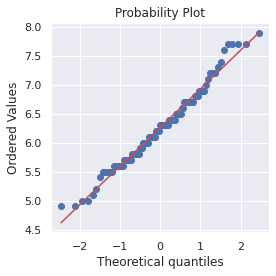

In [92]:
fig, ax = plt.subplots(figsize=(4, 4))

stats.probplot(iris_df["Sepal.Length"], plot=ax)

plt.tight_layout()
plt.show()

In [93]:
# Парный Т-тест
pt_test = scipy.stats.ttest_rel(iris_df["Sepal.Length"], iris_df["Sepal.Width"])
pt_test

Ttest_relResult(statistic=61.30714401143194, pvalue=1.4790717979416083e-80)

Для визуализации "планок погрешностей" можно использовать:

- matplotlib, а именно matplotlib.pyplot.errorbar: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html

- seaborn.pointplot: https://seaborn.pydata.org/generated/seaborn.pointplot.html

In [94]:
iris_df.Species.unique()

array(['versicolor', 'virginica'], dtype=object)

In [95]:
a = iris_df[iris_df.Species == "versicolor"]["Sepal.Length"].mean()
a

5.936

<ErrorbarContainer object of 3 artists>

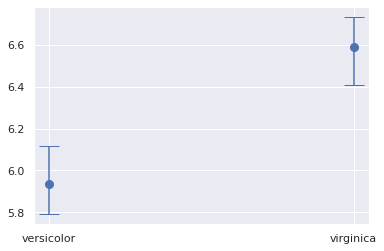

In [96]:
# Хехе, получилось!
a_origin = iris_df[iris_df.Species == "versicolor"]["Sepal.Length"]
a = iris_df[iris_df.Species == "versicolor"]["Sepal.Length"].mean()
b_origin = iris_df[iris_df.Species == "virginica"]["Sepal.Length"]
b = iris_df[iris_df.Species == "virginica"]["Sepal.Length"].mean()

plt.errorbar(x=iris_df.Species.unique(), y=[a, b], 
             yerr=[a-st.t.interval(0.95, len(a_origin)-1, loc=np.mean(a_origin), scale=st.sem(a_origin)), 
                  b-st.t.interval(0.95, len(b_origin)-1, loc=np.mean(b_origin), scale=st.sem(b_origin))],
             data=iris_df, fmt="o", markersize=8, capsize=10) # fmt="-o", "--o", ".k"

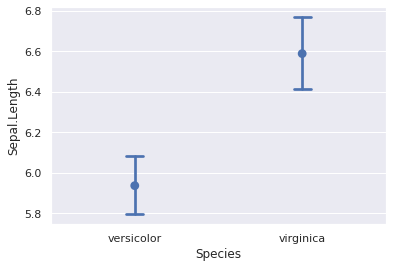

In [97]:
sns.set_theme(style="darkgrid")
ax = sns.pointplot(x="Species", y="Sepal.Length", data=iris_df, join=False, capsize=.1)

In [98]:
# Непараметрический тест на нормальность (Манна-Уитни), в англоязычной литературе - Уилкоксона
wtest = scipy.stats.wilcoxon(iris_df[iris_df.Species == "virginica"]["Sepal.Length"], 
                            iris_df[iris_df.Species == "versicolor"]["Sepal.Length"])
print(wtest)
mw_test = scipy.stats.mannwhitneyu(iris_df[iris_df.Species == "virginica"]["Sepal.Length"], 
                                   iris_df[iris_df.Species == "versicolor"]["Sepal.Length"])
print(mw_test)
# Получается, что реализации этих тестов различаются в R и Python. Подробности по ссылке:
# https://stackoverflow.com/questions/33579785/difference-between-wilcoxon-test-in-r-and-python
# Вывод - Можно использовать и Python, но если p-value различаются, то лучше полагаться на R.
# Однако, немаловажно отметить, что тест Бартлетта и Т-тест совпадают. 

WilcoxonResult(statistic=171.0, pvalue=1.883485656410222e-05)
MannwhitneyuResult(statistic=526.0, pvalue=2.9345032053320985e-07)


In [99]:
model_iris = smf.ols('iris["Sepal.Width"] ~ Species', data=iris).fit()
model_iris.summary() if str(input()) == "1" else print(model_iris.summary())

2
                             OLS Regression Results                            
Dep. Variable:     iris["Sepal.Width"]   R-squared:                       0.401
Model:                             OLS   Adj. R-squared:                  0.393
Method:                  Least Squares   F-statistic:                     49.16
Date:                 Tue, 10 Nov 2020   Prob (F-statistic):           4.49e-17
Time:                         18:47:55   Log-Likelihood:                -49.366
No. Observations:                  150   AIC:                             104.7
Df Residuals:                      147   BIC:                             113.8
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept         

In [100]:
aov_table_iris = sm.stats.anova_lm(model_iris)
aov_table_iris

,df,sum_sq,mean_sq,F,PR(>F)
Species,2.0,11.344933,5.672467,49.16004,4.492017e-17
Residual,147.0,16.962000,0.115388,NaN,NaN


In [101]:
tukey_test_result_iris = sm.stats.multicomp.pairwise_tukeyhsd(endog=iris["Sepal.Width"], groups=iris["Species"])
print(tukey_test_result_iris)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower   upper  reject
------------------------------------------------------------
    setosa versicolor   -0.658  0.001 -0.8189 -0.4971   True
    setosa  virginica   -0.454  0.001 -0.6149 -0.2931   True
versicolor  virginica    0.204 0.0088  0.0431  0.3649   True
------------------------------------------------------------


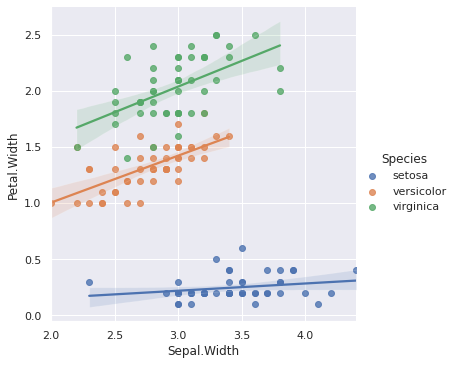

In [102]:
# https://stepik.org/lesson/11508/step/15?unit=2531
sns.lmplot(x="Sepal.Width", y="Petal.Width", hue="Species", data=iris)

In [103]:
# import seaborn as sns
# import statsmodels.api as sm

# iris = sns.load_dataset("iris")
# tukey_test_result_iris = sm.stats.multicomp.pairwise_tukeyhsd(endog=iris.sepal_width, groups=iris.species)
# print(tukey_test_result_iris)

In [104]:
# DATA =  "~/Downloads/"
# path = DATA + "dataset_11504_15 (1).txt"
# df = pd.read_csv(path, sep=" ", header=None)
# df.columns = ["V1", "V2"]
# df.head()

In [105]:
# stat, p = scipy.stats.bartlett(df[df.V2 == 1]["V1"], 
#                                df[df.V2 == 2]["V1"])
# print("The test statistic is {}. \nThe p-value of the test is {}.".format(stat, p))

In [106]:
# wtest = scipy.stats.wilcoxon(df[df.V2 == 1]["V1"], 
#                              df[df.V2 == 2]["V1"], mode='approx')
# wtest

In [107]:
# scipy.stats.wilcoxon(df[df.V2 == 1]["V1"], df[df.V2 == 2]["V1"])[1]

In [108]:
# # Предполагается, что Вы уже скачали необходимый датасет и знаете путь до него
# import pandas as pd
# import scipy.stats

# DATA =  "~/Downloads/"
# path = DATA + "dataset_11504_15.txt"
# df = pd.read_csv(path, sep=" ", header=None)
# df.columns = ["V1", "V2"]
# print(scipy.stats.wilcoxon(df[df.V2 == 1]["V1"], df[df.V2 == 2]["V1"])[1]) if (scipy.stats.bartlett(df[df.V2 == 1]["V1"], df[df.V2 == 2]["V1"])[1] < 0.05) else print(scipy.stats.ttest_ind(df[df.V2 == 1]["V1"], df[df.V2 == 2]["V1"])[1])

In [109]:
# # Предполагается, что Вы уже скачали необходимый датасет и знаете путь до него
# import pandas as pd
# import scipy.stats

# DATA =  "~/Downloads/"
# path = DATA + "dataset_11504_16.txt"
# df = pd.read_csv(path, sep=" ", header=None)
# df.columns = ["V1", "V2"]
# print("{} {} {}".format(df.V1.mean(),df.V2.mean(),scipy.stats.ttest_ind(df.V1, df.V2)[1])) if (scipy.stats.ttest_ind(df.V1, df.V2)[1] < 0.05) else print("The difference is not significant")

### NEW DATASET

In [110]:
DATA = "~/PycharmProjects/Datasets/"
swiss_path = DATA + "swiss.csv"
swiss = pd.read_csv(swiss_path, index_col=0)
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


In [111]:
model_swiss = smf.ols("Fertility ~ Examination + Catholic", swiss)

res = model_swiss.fit()

print(res.params)
print(res.summary())

Intercept      83.035655
Examination    -0.886186
Catholic        0.041793
dtype: float64
                            OLS Regression Results                            
Dep. Variable:              Fertility   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     16.61
Date:                Tue, 10 Nov 2020   Prob (F-statistic):           4.22e-06
Time:                        18:47:56   Log-Likelihood:                -171.64
No. Observations:                  47   AIC:                             349.3
Df Residuals:                      44   BIC:                             354.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [112]:
model_swiss_2 = smf.ols("Fertility ~ Examination * Catholic", swiss)

res_2 = model_swiss_2.fit()

print(res_2.params)
print(res_2.summary())

Intercept               80.957567
Examination             -0.765480
Catholic                 0.083823
Examination:Catholic    -0.003337
dtype: float64
                            OLS Regression Results                            
Dep. Variable:              Fertility   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     10.98
Date:                Tue, 10 Nov 2020   Prob (F-statistic):           1.77e-05
Time:                        18:47:56   Log-Likelihood:                -171.50
No. Observations:                  47   AIC:                             351.0
Df Residuals:                      43   BIC:                             358.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      

In [113]:
# Доверительные интервалы для оценки коэффициентов: 0 - 2.5%; 1 - 97.5%
res_2.conf_int()

,0,1
Intercept,67.906075,94.009058
Examination,-1.416934,-0.114025
Catholic,-0.103020,0.270665
Examination:Catholic,-0.016565,0.009891


Только в Examination в доверительный интервал не входит 0 - это означает, что этот параметр надёжно предсказывает результат.

In [114]:
swiss_df = swiss.copy()

In [115]:
swiss_df["religious"] = np.where(swiss_df["Catholic"] > 60, "Lots", "Few")

In [116]:
swiss_df.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,religious
Courtelary,80.2,17.0,15,12,9.96,22.2,Few
Delemont,83.1,45.1,6,9,84.84,22.2,Lots
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,Lots
Moutier,85.8,36.5,12,7,33.77,20.3,Few
Neuveville,76.9,43.5,17,15,5.16,20.6,Few


In [117]:
model_swiss_3 = smf.ols("Fertility ~ Examination + religious", swiss_df)

res_3 = model_swiss_3.fit()

print(res_3.params)
print("---------------")
print(res_3.summary())
print("---------------")
print(res_3.conf_int())

Intercept            78.575260
religious[T.Lots]     8.446884
Examination          -0.685790
dtype: float64
---------------
                            OLS Regression Results                            
Dep. Variable:              Fertility   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     20.21
Date:                Tue, 10 Nov 2020   Prob (F-statistic):           5.93e-07
Time:                        18:47:56   Log-Likelihood:                -169.55
No. Observations:                  47   AIC:                             345.1
Df Residuals:                      44   BIC:                             350.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]


In [118]:
model_swiss_4 = smf.ols("Fertility ~ Examination * religious", swiss_df)

res_4 = model_swiss_4.fit()

print(res_4.params)
print("---------------")
print(res_4.summary())
print("---------------")
print(res_4.conf_int())
# Все интервалы, которые не пересекают 0 - имеют статистическую значимость. И чем дальше от 0
# не важно в какую сторону, тем сильнее. Значение P>|t| до 0.1 представляет собой статистическую тенденцию.
# Хоть важность и не велика, но это знак, что нужно обратить внимание на эту переменную.

Intercept                        82.116030
religious[T.Lots]                -2.961498
Examination                      -0.861694
Examination:religious[T.Lots]     1.009558
dtype: float64
---------------
                            OLS Regression Results                            
Dep. Variable:              Fertility   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     15.16
Date:                Tue, 10 Nov 2020   Prob (F-statistic):           7.13e-07
Time:                        18:47:56   Log-Likelihood:                -167.91
No. Observations:                  47   AIC:                             343.8
Df Residuals:                      43   BIC:                             351.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
       

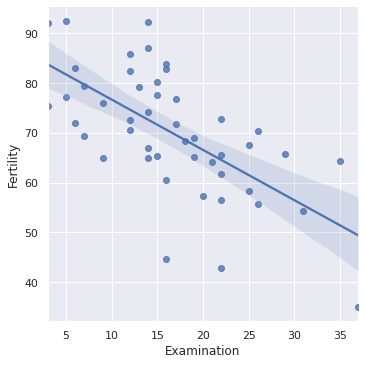

In [119]:
sns.lmplot(x="Examination", y="Fertility", data=swiss_df)

<AxesSubplot:xlabel='Examination', ylabel='Fertility'>

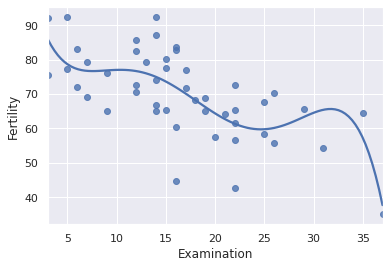

In [120]:
sns.regplot(x="Examination", y="Fertility", data=swiss_df, order=5, ci=None)

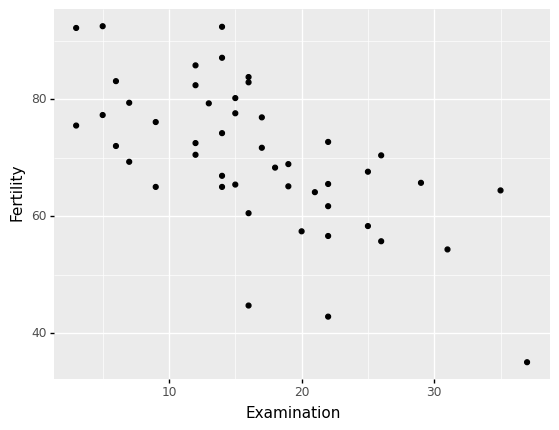

<ggplot: (8735221301477)>

In [121]:
from plotnine import ggplot, geom_point, geom_smooth, aes, stat_smooth, facet_wrap

ggplot(swiss_df, aes(x = "Examination", y = "Fertility")) + geom_point() 

/home/aleksey/PycharmProjects/Practical_Statistics/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


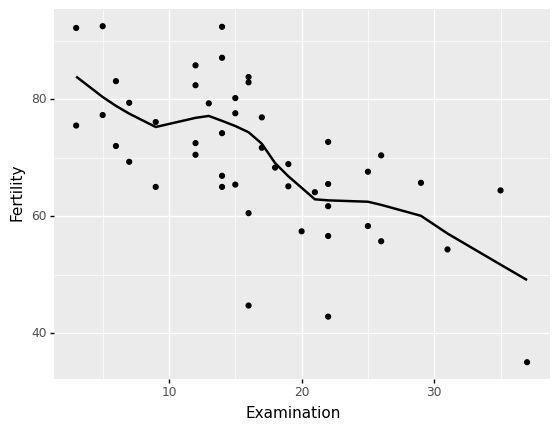

<ggplot: (8735221303941)>

In [122]:
ggplot(swiss_df, aes(x = "Examination", y = "Fertility")) + geom_point() + geom_smooth(span=.4)

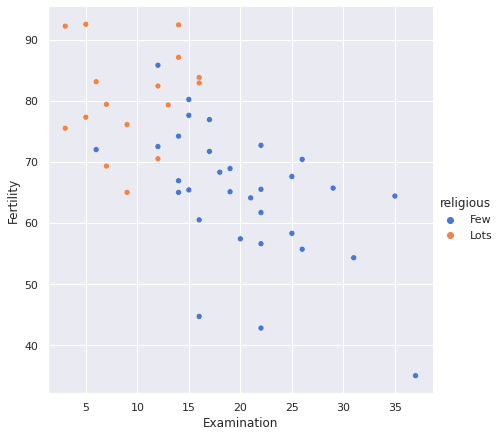

In [123]:
sns.set_theme(style="darkgrid")
sns.relplot(x="Examination", y="Fertility", hue="religious", palette="muted", height=6, data=swiss_df)

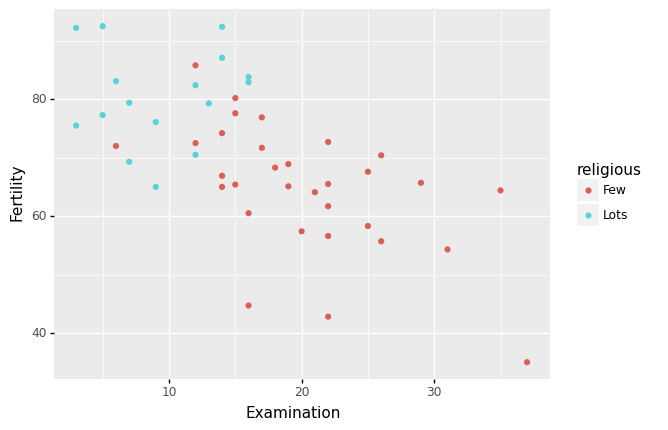

<ggplot: (8735221303818)>

In [124]:
ggplot(swiss_df, aes(x = "Examination", y = "Fertility", color = "religious")) + geom_point() 

/home/aleksey/PycharmProjects/Practical_Statistics/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


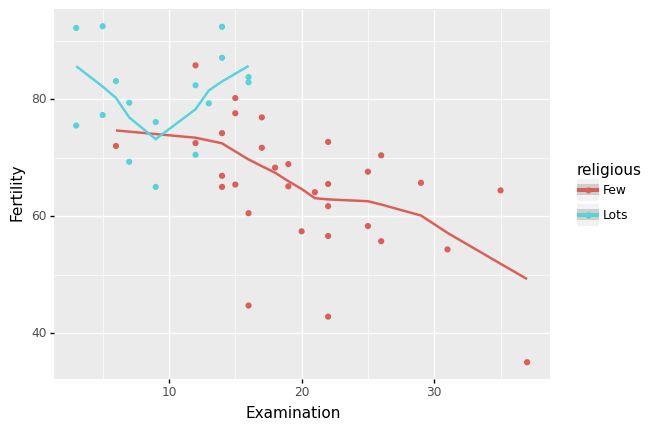

<ggplot: (8735221214627)>

In [125]:
ggplot(swiss_df, aes(x = "Examination", y = "Fertility", color = "religious")) + geom_point() + geom_smooth(span=.6)

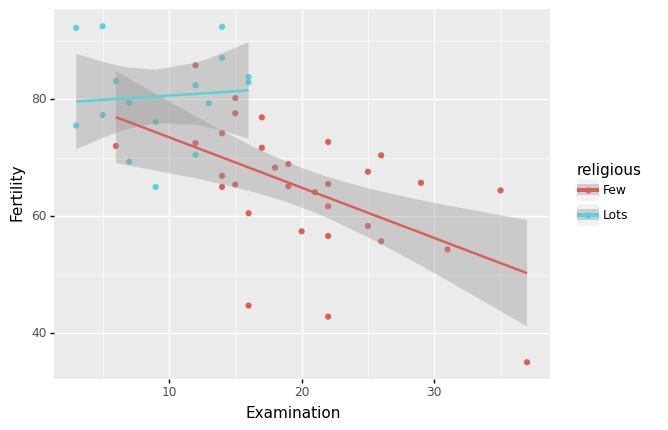

<ggplot: (8735221214714)>

In [126]:
ggplot(swiss_df, aes(x = "Examination", y = "Fertility", color = "religious")) + \
geom_point() + geom_smooth(span=.6, method='lm')

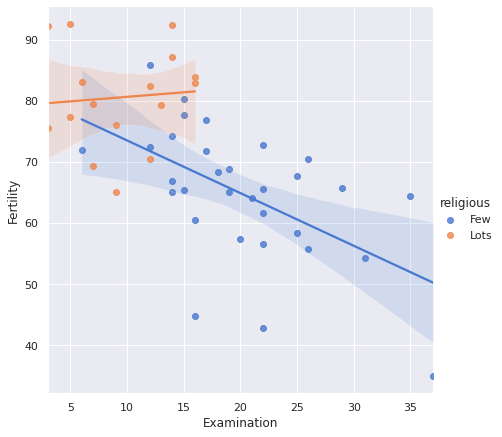

In [127]:
sns.lmplot(x="Examination", y="Fertility", hue="religious", palette="muted", height=6, data=swiss_df)

In [128]:
swiss_df = swiss_df.rename(columns={"Infant.Mortality" : "Infant_Mortality"})
swiss_df.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant_Mortality,religious
Courtelary,80.2,17.0,15,12,9.96,22.2,Few
Delemont,83.1,45.1,6,9,84.84,22.2,Lots
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,Lots
Moutier,85.8,36.5,12,7,33.77,20.3,Few
Neuveville,76.9,43.5,17,15,5.16,20.6,Few


In [129]:
model_swiss_5 = smf.ols("Fertility ~ Examination * religious * Infant_Mortality", swiss_df)

res_5 = model_swiss_5.fit()

print(res_5.params)
print("---------------")
print(res_5.summary())
print("---------------")
print(res_5.conf_int())

Intercept                                         42.587288
religious[T.Lots]                                 63.119785
Examination                                       -0.266523
Examination:religious[T.Lots]                     -5.151964
Infant_Mortality                                   1.902632
religious[T.Lots]:Infant_Mortality                -3.065612
Examination:Infant_Mortality                      -0.024630
Examination:religious[T.Lots]:Infant_Mortality     0.269279
dtype: float64
---------------
                            OLS Regression Results                            
Dep. Variable:              Fertility   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     8.345
Date:                Tue, 10 Nov 2020   Prob (F-statistic):           3.34e-06
Time:                        18:47:59   Log-Likelihood:                -163.35
No. Observation

In [130]:
DATA = "~/PycharmProjects/Datasets/"
swiss_path = DATA + "swiss.csv"
swiss = pd.read_csv(swiss_path, index_col=0)
swiss = swiss.rename(columns={"Infant.Mortality" : "Infant_Mortality"})
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant_Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


In [131]:
model_swiss_full = smf.ols("Fertility ~ Infant_Mortality + Education + Catholic + Agriculture + Examination", swiss)
res_full = model_swiss_full.fit()
print(res_full.summary())
print("\n------------------------------------\n")
model_swiss_reduced = smf.ols("Fertility ~ Infant_Mortality + Education + Catholic + Examination", swiss)
res_reduced = model_swiss_reduced.fit()
print(res_reduced.summary())

                            OLS Regression Results                            
Dep. Variable:              Fertility   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     19.76
Date:                Tue, 10 Nov 2020   Prob (F-statistic):           5.59e-10
Time:                        18:47:59   Log-Likelihood:                -156.04
No. Observations:                  47   AIC:                             324.1
Df Residuals:                      41   BIC:                             335.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           66.9152     10.706  

In [132]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

table = sm.stats.anova_lm(res_reduced, res_full) 
table
# РАБОТАЕТ!

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,42.0,2412.759037,0.0,NaN,NaN,NaN
1,41.0,2105.042930,1.0,307.716106,5.993398,0.018727


Результаты таблицы показывают, что так как F-значение высокое, то доля дисперсии, объясняемая полной моделью значимо больше, чем объясняемая неполной. Значит - полная лучше.

In [133]:
table = sm.stats.anova_lm(res_full, res_reduced) 
table
# Неудачный вариант, см. комментарий ниже.

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,41.0,2105.042930,0.0,NaN,NaN,NaN
1,42.0,2412.759037,-1.0,-307.716106,5.356555,NaN


### Важно отметить, что в Python+statsmodels в ANOVA важен порядок передачи моделей. В R - без разницы. А тут результат может и не посчитаться.

In [134]:
model_swiss_reduced_2 = smf.ols("Fertility ~ Infant_Mortality + Education + Catholic + Agriculture", swiss)
res_reduced_2 = model_swiss_reduced_2.fit()
print(res_reduced_2.summary())

                            OLS Regression Results                            
Dep. Variable:              Fertility   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     24.42
Date:                Tue, 10 Nov 2020   Prob (F-statistic):           1.72e-10
Time:                        18:47:59   Log-Likelihood:                -156.62
No. Observations:                  47   AIC:                             323.2
Df Residuals:                      42   BIC:                             332.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           62.1013      9.605  

In [135]:
table = sm.stats.anova_lm(res_reduced_2, res_full) 
table
# Р-уровень значимости высокий - значит полная модель не лучше, чем урезанная.

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,42.0,2158.069487,0.0,NaN,NaN,NaN
1,41.0,2105.042930,1.0,53.026557,1.0328,0.315462


P-уровень значимости высокий - значит полная модель не лучше, чем урезанная и они примерно одинаково объясняют дисперсию в результатах.

array([[<AxesSubplot:xlabel='Fertility', ylabel='Fertility'>,
        <AxesSubplot:xlabel='Agriculture', ylabel='Fertility'>,
        <AxesSubplot:xlabel='Examination', ylabel='Fertility'>,
        <AxesSubplot:xlabel='Education', ylabel='Fertility'>,
        <AxesSubplot:xlabel='Catholic', ylabel='Fertility'>,
        <AxesSubplot:xlabel='Infant_Mortality', ylabel='Fertility'>],
       [<AxesSubplot:xlabel='Fertility', ylabel='Agriculture'>,
        <AxesSubplot:xlabel='Agriculture', ylabel='Agriculture'>,
        <AxesSubplot:xlabel='Examination', ylabel='Agriculture'>,
        <AxesSubplot:xlabel='Education', ylabel='Agriculture'>,
        <AxesSubplot:xlabel='Catholic', ylabel='Agriculture'>,
        <AxesSubplot:xlabel='Infant_Mortality', ylabel='Agriculture'>],
       [<AxesSubplot:xlabel='Fertility', ylabel='Examination'>,
        <AxesSubplot:xlabel='Agriculture', ylabel='Examination'>,
        <AxesSubplot:xlabel='Examination', ylabel='Examination'>,
        <AxesSubplot:xlabe

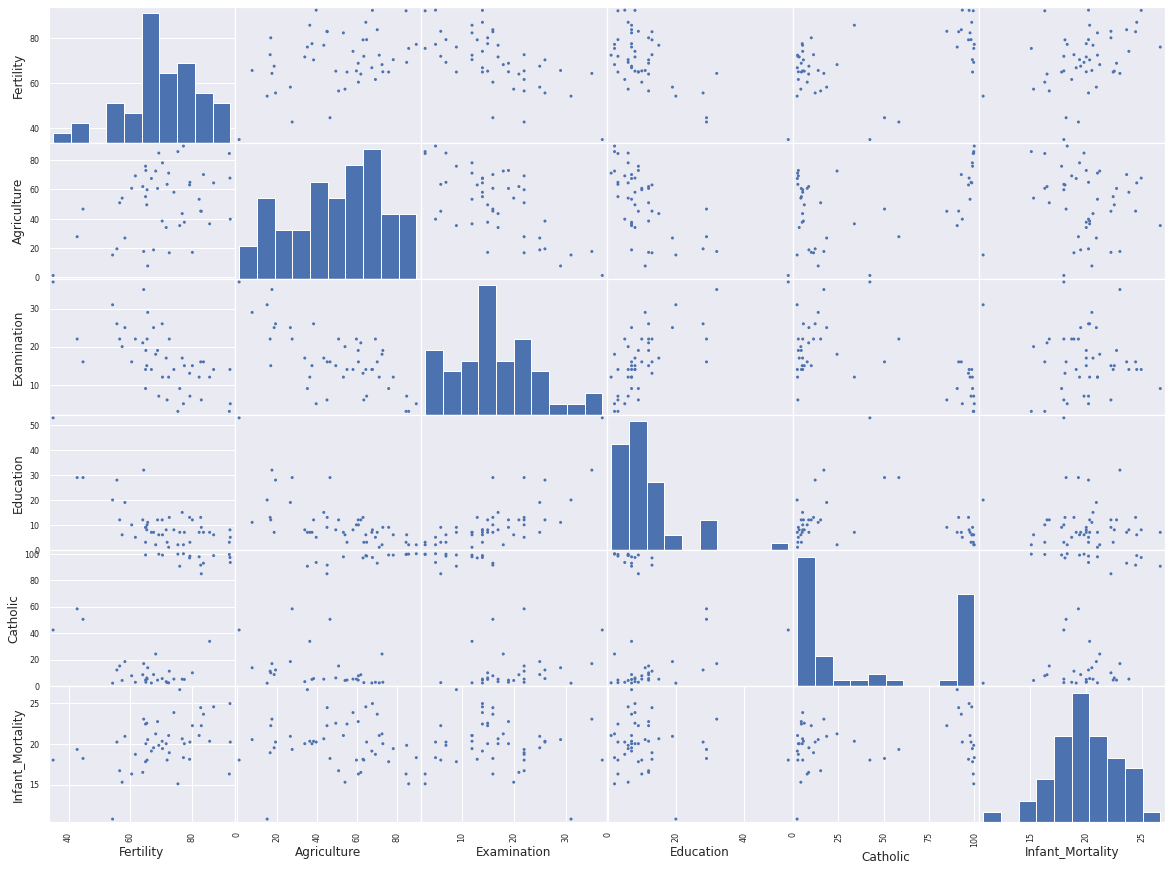

In [286]:
pd.plotting.scatter_matrix(swiss, alpha=1, figsize=(20,15))

<AxesSubplot:xlabel='Examination', ylabel='Education'>

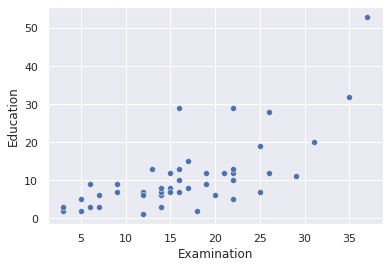

In [287]:
sns.scatterplot(x = "Examination", y = "Education", data = swiss)

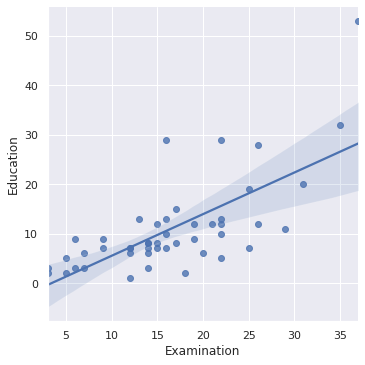

In [288]:
sns.lmplot(x = "Examination", y = "Education", data = swiss)

<AxesSubplot:>

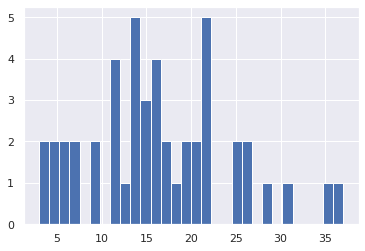

In [297]:
swiss["Examination"].hist(bins=30)

<AxesSubplot:>

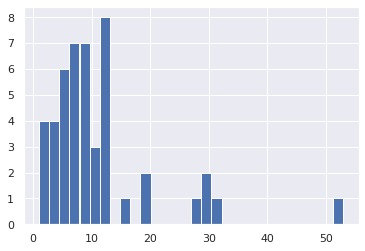

In [298]:
swiss["Education"].hist(bins=30)

<AxesSubplot:>

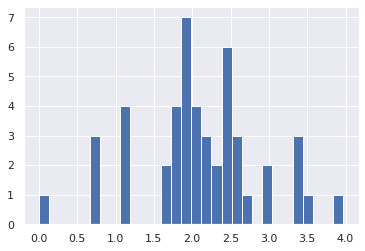

In [299]:
np.log(swiss["Education"]).hist(bins=30)

## NEW DATASET

In [136]:
DATA = "~/PycharmProjects/Datasets/"
attitude_path = DATA + "attitude.csv"
attitude = pd.read_csv(attitude_path, index_col=0)
attitude.head()

,rating,complaints,privileges,learning,raises,critical,advance
1,43,51,30,39,61,92,45
2,63,64,51,54,63,73,47
3,71,70,68,69,76,86,48
4,61,63,45,47,54,84,35
5,81,78,56,66,71,83,47


In [137]:
attitude_model_full = smf.ols("rating ~ complaints + privileges + learning + raises + critical + advance", attitude)
res_attitude_model_full = attitude_model_full.fit()
print(res_attitude_model_full.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     10.50
Date:                Tue, 10 Nov 2020   Prob (F-statistic):           1.24e-05
Time:                        18:47:59   Log-Likelihood:                -97.250
No. Observations:                  30   AIC:                             208.5
Df Residuals:                      23   BIC:                             218.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.7871     11.589      0.931      0.3

In [138]:
attitude_model_null = smf.ols("rating ~ 1", attitude)
res_attitude_model_null = attitude_model_null.fit()
print(res_attitude_model_null.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 10 Nov 2020   Prob (F-statistic):                nan
Time:                        18:47:59   Log-Likelihood:                -117.04
No. Observations:                  30   AIC:                             236.1
Df Residuals:                      29   BIC:                             237.5
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     64.6333      2.222     29.083      0.0

https://stackoverflow.com/questions/22428625/does-statsmodels-or-another-python-package-offer-an-equivalent-to-rs-step-f

https://stackoverflow.com/questions/49493468/python-equivalent-for-r-stepaic-for-logistic-regression-direction-backwards

https://www.reddit.com/r/pystats/comments/68pikh/python_equivalent_for_r_stepwise_regression/

In [284]:
# print(attitude.columns)
# print(len(attitude.columns))

In [285]:
# Код с просторов stackoverflow для рассчёта 
import itertools
import statsmodels.api as sm

# Не работает правильно - надо разобраться почему.
# AICs = {}
# for k in range(1,len(swiss.columns)+1):
#     for variables in itertools.combinations(attitude.columns, k):
#         predictors = attitude.loc[:, list(variables)]
#         predictors['Intercept'] = 1
#         res = sm.OLS(attitude['rating'], predictors).fit()
#         AICs[variables] = 2*(k+1) - 2*res.llf
# print(pd.Series(AICs).idxmin())
# print(pd.Series(AICs))
# {k: v for k, v in sorted(AICs.items(), key=lambda item: item[1])}

# -------------------------------------------------------------------

# AICs = {}
# for k in range(1,len(attitude.columns)+1):
#     for variables in itertools.combinations(attitude.columns, k):
#         predictors = list(variables)
#         i = True
#         independent =''
#         for p in predictors:
#             if i:
#                 independent = p
#                 i = False
#             else:
#                 independent+='+ {}'.format(p)
#         regresion = 'rating ~ {}'.format(independent)
#         res = smf.ols(regresion, data=attitude).fit()
#         AICs[variables] = 2*(k+1) - 2*res.llf
# pd.Series(AICs).idxmin()


# Не работает правильно - надо разобраться почему.

In [141]:
# sns.residplot(x="Examination", y="Fertility", data=swiss_df)
# График остатков. На будущее. 

In [142]:
# import ggplot

# ggplot(swiss, aes(x = Examination, y = Fertility)) + \
#   geom_point() + geom_smooth()

### NEW DATASET

In [143]:
DATA = "~/PycharmProjects/Datasets/"
tooth_path = DATA + "ToothGrowth.csv"
toothgrowth = pd.read_csv(tooth_path, index_col=0)

In [144]:
toothgrowth.head(10)

,len,supp,dose
1,4.2,VC,0.5
2,11.5,VC,0.5
3,7.3,VC,0.5
4,5.8,VC,0.5
5,6.4,VC,0.5
6,10.0,VC,0.5
7,11.2,VC,0.5
8,11.2,VC,0.5
9,5.2,VC,0.5
10,7.0,VC,0.5


In [145]:
toothgrowth.shape

(60, 3)

In [146]:
toothgrowth.describe()

,len,dose
count,60.000000,60.000000
mean,18.813333,1.166667
std,7.649315,0.628872
min,4.200000,0.500000
25%,13.075000,0.500000
50%,19.250000,1.000000
75%,25.275000,2.000000
max,33.900000,2.000000


In [147]:
subset_oj = toothgrowth[(toothgrowth.supp == "OJ") & (toothgrowth.dose == 0.5)]
subset_vc = toothgrowth[(toothgrowth.supp == "VC") & (toothgrowth.dose == 2.0)]

In [148]:
t_test = st.ttest_ind(subset_oj.len, subset_vc.len) 
t_test.statistic

-6.232482137515355

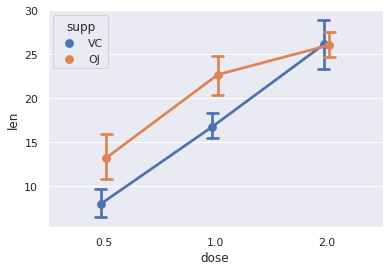

In [149]:
sns.set_theme(style="darkgrid")
ax = sns.pointplot(x="dose", y="len", hue="supp", data=toothgrowth, join=True, capsize=.1, dodge=True)

In [150]:
# # Предполагается, что Вы уже скачали необходимый датасет и знаете путь до него
# import pandas as pd
# import scipy.stats

# tooth_path = PATH_TO_DATA + "ToothGrowth.csv"
# toothgrowth = pd.read_csv(tooth_path, index_col=0)
# t_test = scipy.stats.ttest_ind(toothgrowth[(toothgrowth.supp == "OJ") & (toothgrowth.dose == 0.5)].len, 
#                                toothgrowth[(toothgrowth.supp == "VC") & (toothgrowth.dose == 2.0)].len) 
# print(t_test.statistic)

In [151]:
# # Предполагается, что Вы уже скачали необходимый датасет и знаете путь до него
# import pandas as pd
# import seaborn as sns
# tooth_path = PATH_TO_DATA + "ToothGrowth.csv"
# toothgrowth = pd.read_csv(tooth_path, index_col=0)
# sns.set_theme(style="darkgrid")
# ax = sns.pointplot(x="dose", y="len", hue="supp", data=toothgrowth, join=True, capsize=.1, dodge=True)

### NEW DATASET

In [152]:
DATA = "~/PycharmProjects/Datasets/"
lec_path = DATA + "lekarstva.csv"
lekarstva = pd.read_csv(lec_path, index_col=0)

In [153]:
print(lekarstva.shape)
lekarstva.head()

(174, 5)


,Uroven_sahara_v_krovi,Pressure_before,Pressure_after,Holesterin (Aprel),Holesterin (Mart)
Group,,,,,
2,90,170,135,235,205
2,85,160,155,185,195
1,95,165,155,235,260
1,86,170,165,155,136
2,104,170,165,260,250


In [154]:
lekarstva.describe()

,Uroven_sahara_v_krovi,Pressure_before,Pressure_after,Holesterin (Aprel),Holesterin (Mart)
count,174.000000,174.000000,174.000000,174.000000,174.000000
mean,103.988506,172.097701,156.724138,239.195402,233.097701
std,35.608499,13.855017,15.183418,49.510165,51.975057
min,68.000000,140.000000,125.000000,120.000000,113.000000
25%,86.000000,160.000000,150.000000,202.000000,196.250000
50%,95.500000,170.000000,155.000000,235.000000,228.000000
75%,110.000000,180.000000,163.750000,271.000000,261.000000
max,352.000000,220.000000,210.000000,381.000000,401.000000


In [155]:
lec_pair_t_test = scipy.stats.ttest_rel(lekarstva.Pressure_after, lekarstva.Pressure_before) 
lec_pair_t_test.statistic

-14.226730711863198

In [156]:
# # Предполагается, что Вы уже скачали необходимый датасет и знаете путь до него
# import pandas as pd
# import scipy.stats

# lec_path = PATH_TO_DATA + "lekarstva.csv"
# lekarstva = pd.read_csv(lec_path, index_col=0)
# lec_pair_t_test = scipy.stats.ttest_rel(lekarstva.Pressure_before, lekarstva.Pressure_after) 
# print(lec_pair_t_test.statistic)

## NEW CHAPTER AND NEW DATASET

In [157]:
DATA = "~/PycharmProjects/Datasets/"
grants_path = DATA + "grants.csv"
grants = pd.read_csv(grants_path)

In [158]:
grants.head()

,npersons,years_in_uni,oldest_age,field,RFCD.Code.1,midpoint,status
0,2.0,< 5,66.0,bio,270799,24999.5,1
1,1.0,< 5,51.0,bio,270106,24999.5,0
2,1.0,< 5,36.0,bio,270708,24999.5,0
3,1.0,5-10,46.0,bio,270603,24999.5,0
4,4.0,> 10,46.0,physics,240402,24999.5,1


In [159]:
grants.shape

(1420, 7)

In [160]:
grants.isna().sum()

npersons          7
years_in_uni      0
oldest_age       57
field             0
RFCD.Code.1       0
midpoint        586
status            0
dtype: int64

In [161]:
grants.describe()

,npersons,oldest_age,RFCD.Code.1,midpoint,status
count,1413.000000,1363.000000,1420.000000,834.000000,1420.000000
mean,1.991507,46.220103,283534.757746,56534.272182,0.473944
std,1.402623,10.049217,43515.351061,84821.226389,0.499497
min,1.000000,25.000000,240100.000000,24999.500000,0.000000
25%,1.000000,38.000000,270103.000000,24999.500000,0.000000
50%,2.000000,46.000000,270210.000000,24999.500000,0.000000
75%,2.000000,53.000000,270702.000000,49999.500000,1.000000
max,15.000000,77.000000,380399.000000,499999.500000,1.000000


In [162]:
grants_df = grants.copy()

In [163]:
grants_df["status"] = grants_df["status"].replace({0 : "Not funded", 1 : "Funded"})

In [164]:
grants_df["status"].unique()

array(['Funded', 'Not funded'], dtype=object)

In [165]:
grants_df.head(3)

,npersons,years_in_uni,oldest_age,field,RFCD.Code.1,midpoint,status
0,2.0,< 5,66.0,bio,270799,24999.5,Funded
1,1.0,< 5,51.0,bio,270106,24999.5,Not funded
2,1.0,< 5,36.0,bio,270708,24999.5,Not funded


In [166]:
table_1 = pd.pivot_table(grants_df, index="status", values="field", aggfunc="count")
table_1

,field
status,
Funded,673
Not funded,747


In [167]:
table_2 = pd.pivot_table(grants_df, index=["field"], columns=["status"], aggfunc="count")
table_2

RFCD.Code.1            midpoint            npersons             \
status       Funded Not funded   Funded Not funded   Funded Not funded   
field                                                                    
beh_cog          65        100       52         25       65         99   
bio             432        473      374        192      431        470   
chem             66         60       58         18       66         60   
physics          78         70       60         15       77         70   
soc              32         44       30         10       32         43   

        oldest_age            years_in_uni             
status      Funded Not funded       Funded Not funded  
field                                                  
beh_cog         61         97           65        100  
bio            423        450          432        473  
chem            64         58           66         60  
physics         76         62           78         70  
soc             32         40           32         44

In [168]:
# Неудачные попытки
# -----------------------------
# grants_df.groupby(["field", "status"]).agg({"status" : "count"}).unstack()
# -----------------------------
# table_2 = grants_df.pivot_table(index="status", columns=["field"], aggfunc="count")
# table_2

In [169]:
dist = grants_df.groupby(["field", "status"])["status"].count().unstack()
dist

status,Funded,Not funded
field,,
beh_cog,65,100
bio,432,473
chem,66,60
physics,78,70
soc,32,44


In [170]:
# Binom test
p_value_1 = scipy.stats.binom_test(table_1)
p_value_1

array([0.05268034])

In [171]:
# ChiSquare test
cs_res_1 = scipy.stats.chisquare(table_1)
print(cs_res_1)
print("The chi-squared test statistic is {}; \nThe p-value of the test is {}.".format(cs_res_1[0], cs_res_1[1]))

Power_divergenceResult(statistic=array([3.85633803]), pvalue=array([0.04955838]))
The chi-squared test statistic is [3.85633803]; 
The p-value of the test is [0.04955838].


In [172]:
cs_res_2 = scipy.stats.chisquare(dist.T)
cs_res_2

Power_divergenceResult(statistic=array([7.42424242, 1.85745856, 0.28571429, 0.43243243, 1.89473684]), pvalue=array([0.00643509, 0.17291841, 0.5929801 , 0.5107978 , 0.16866862]))

### New Dataset

In [173]:
DATA = "~/PycharmProjects/Datasets/"
hec_path = DATA + "HairEyeColor.csv"
hec = pd.read_csv(hec_path)

In [174]:
hec = hec.drop("Unnamed: 0", axis=1)

In [175]:
hec.head()

,Hair,Eye,Sex,Freq
0,Black,Brown,Male,32
1,Brown,Brown,Male,53
2,Red,Brown,Male,10
3,Blond,Brown,Male,3
4,Black,Blue,Male,11


In [176]:
hec_fem = hec[hec.Sex == "Female"]
hec_fem

,Hair,Eye,Sex,Freq
16,Black,Brown,Female,36
17,Brown,Brown,Female,66
18,Red,Brown,Female,16
19,Blond,Brown,Female,4
20,Black,Blue,Female,9
21,Brown,Blue,Female,34
22,Red,Blue,Female,7
23,Blond,Blue,Female,64
24,Black,Hazel,Female,5
25,Brown,Hazel,Female,29


In [177]:
# Неудачные попытки
# sns.histplot(data=hec_fem, x="Hair", y="Freq")

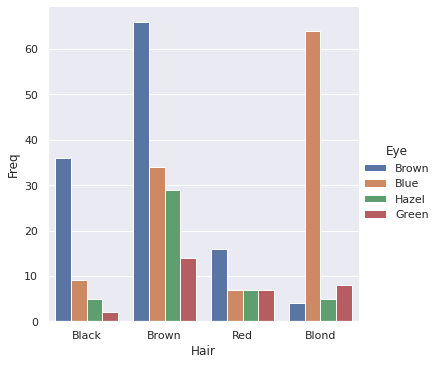

In [178]:
sns.catplot(data=hec_fem, x="Hair", y="Freq", hue="Eye", kind="bar")

In [179]:
# Как сделать хорошо и правильно? - Посмотри туториалы.
# titanic = sns.load_dataset("titanic")
# sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic)

In [180]:
hec_fem[hec_fem.Hair == "Brown"].iloc[:,[1, 3]]

,Eye,Freq
17,Brown,66
21,Blue,34
25,Hazel,29
29,Green,14


In [181]:
brown_haired_ladies = hec_fem[hec_fem.Hair == "Brown"].iloc[:,[1, 3]].set_index("Eye")
brown_haired_ladies

,Freq
Eye,
Brown,66
Blue,34
Hazel,29
Green,14


In [182]:
cs_res_3 = scipy.stats.chisquare(brown_haired_ladies)
print(cs_res_3)
print("The chi-squared test statistic is {}; \nThe p-value of the test is {}.".format(cs_res_3[0], cs_res_3[1]))

Power_divergenceResult(statistic=array([40.18881119]), pvalue=array([9.71700305e-09]))
The chi-squared test statistic is [40.18881119]; 
The p-value of the test is [9.71700305e-09].


In [183]:
DATA = "~/PycharmProjects/Datasets/"
hec_path = DATA + "HairEyeColor.csv"
hec = pd.read_csv(hec_path, index_col=0)
brown_haired_ladies = hec.query("Sex == 'Female' and Hair == 'Brown'").iloc[:,[1, 3]].set_index("Eye")
chisquare_result = scipy.stats.chisquare(brown_haired_ladies)
print("The chi-squared test statistic is {}; \nThe p-value of the test is {}.".format(chisquare_result[0], chisquare_result[1]))

The chi-squared test statistic is [40.18881119]; 
The p-value of the test is [9.71700305e-09].


### New Dataset

In [184]:
diamonds = sns.load_dataset('diamonds')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [185]:
diamonds = diamonds.sort_values(by=['color', 'cut'])

<AxesSubplot:xlabel='color', ylabel='Count'>

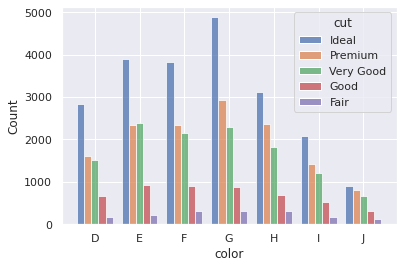

In [186]:
sns.histplot(data=diamonds, x="color", hue="cut", multiple="dodge", shrink=.8)

In [187]:
# import seaborn as sns

# diamonds = sns.load_dataset('diamonds')
# diamonds = diamonds.sort_values(by=['color', 'cut'])
# sns.histplot(data=diamonds, x="color", hue="cut", multiple="dodge", shrink=.7)

In [188]:
diamonds = sns.load_dataset('diamonds')
diamonds = pd.DataFrame(diamonds)
# d = diamonds.groupby(['cut', 'color']).agg({"color" : "count"}).unstack()
d = diamonds.groupby(['cut', 'color'])['cut'].count().unstack()
print(d.shape)
d

(5, 7)


color,D,E,F,G,H,I,J
cut,,,,,,,
Ideal,2834,3903,3826,4884,3115,2093,896
Premium,1603,2337,2331,2924,2360,1428,808
Very Good,1513,2400,2164,2299,1824,1204,678
Good,662,933,909,871,702,522,307
Fair,163,224,312,314,303,175,119


In [189]:
# НЕПРАВИЛЬНО!

# chisquare_result = scipy.stats.chisquare(d, axis=None)
# chisquare_result
# -------------------------------------------------------------
# ПРАВИЛЬНО!
chisquare_result = st.chi2_contingency(d)
chisquare_result

(310.3179005211542,
 1.3945120919852248e-51,
 24,
 array([[2706.85993697, 3914.25930664, 3812.37749351, 4511.56640712,
         3317.7512792 , 2166.28702262, 1121.89855395],
        [1732.18437152, 2504.82808676, 2439.63147942, 2887.05917686,
         2123.1083426 , 1386.25884316,  717.92969967],
        [1517.52966259, 2194.42628847, 2137.30893585, 2529.29076752,
         1860.00978865, 1214.47170931,  628.96284761],
        [ 616.2059696 ,  891.06566555,  867.87267334, 1027.04026696,
          755.27296997,  493.1466815 ,  255.39577308],
        [ 202.22005933,  292.42065258,  284.80941787,  337.04338154,
          247.85761958,  161.83574342,   83.8131257 ]]))

In [190]:
# # Предполагается, что Вы уже скачали необходимый датасет и знаете путь до него
# import pandas as pd
# import scipy.stats
# import seaborn as sns

# diamonds = sns.load_dataset('diamonds')
# diamonds = pd.DataFrame(diamonds)
# d = diamonds.groupby(['cut', 'color'])['cut'].count().unstack()
# chisquare_result = scipy.stats.chi2_contingency(d)
# chisquare_result

In [191]:
# table_diamonds = pd.pivot_table(diamonds, index=["cut"], columns=["color"], aggfunc="count")
# table_diamonds

In [192]:
diamonds["factor_price"] = np.where(diamonds['price'] >= diamonds.price.mean(), 1, 0)
diamonds["factor_carat"] = np.where(diamonds['carat'] >= diamonds.carat.mean(), 1, 0)

In [193]:
d = diamonds.groupby(['factor_carat', 'factor_price'])['factor_price'].count().unstack()
d

factor_price,0,1
factor_carat,,
0,30929,198
1,3354,19459


In [194]:
chisquare_result = st.chi2_contingency(d)
chisquare_result[0]

40735.2227968624

In [195]:
# # Предполагается, что Вы уже скачали необходимый датасет и знаете путь до него
# import pandas as pd
# import numpy as np
# import scipy.stats
# import seaborn as sns

# diamonds = sns.load_dataset('diamonds')
# diamonds = pd.DataFrame(diamonds)
# diamonds["factor_price"] = np.where(diamonds['price'] >= diamonds.price.mean(), 1, 0)
# diamonds["factor_carat"] = np.where(diamonds['carat'] >= diamonds.carat.mean(), 1, 0)
# d = diamonds.groupby(['factor_carat', 'factor_price'])['factor_price'].count().unstack()
# chisquare_result = scipy.stats.chi2_contingency(d)
# chisquare_result[0]

In [196]:
diamonds[(diamonds.carat == 0.46) & (diamonds.cut == "Ideal")]

,carat,cut,color,clarity,depth,table,price,x,y,z,factor_price,factor_carat
30961,0.46,Ideal,J,VS2,61.4,56.0,746,4.96,5.00,3.06,0,0
31252,0.46,Ideal,F,SI2,61.5,54.0,758,4.98,5.01,3.07,0,0
31253,0.46,Ideal,F,SI2,61.5,54.0,758,4.98,5.01,3.07,0,0
32838,0.46,Ideal,G,SI2,61.1,57.0,807,4.97,5.01,3.05,0,0
32839,0.46,Ideal,H,SI1,61.7,55.0,807,4.99,5.02,3.09,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
47166,0.46,Ideal,E,VS1,60.3,56.0,1834,5.02,5.06,3.04,0,0
48236,0.46,Ideal,F,IF,62.0,55.0,1950,4.96,4.98,3.08,0,0
48263,0.46,Ideal,E,VVS1,62.5,53.0,1955,4.95,5.00,3.11,0,0
48535,0.46,Ideal,G,IF,61.7,56.0,1987,4.97,5.01,3.08,0,0


In [197]:
# https://stepik.org/lesson/11508/step/13?thread=solutions&unit=2531
ideal_diamonds_car46 = diamonds[(diamonds.carat == 0.46) & (diamonds.cut == "Ideal")]

diamonds_model = sm.OLS(ideal_diamonds_car46.price, ideal_diamonds_car46.depth)

res = diamonds_model.fit()

print(res.params)
print(res.summary())

depth    20.205674
dtype: float64
                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.930
Model:                            OLS   Adj. R-squared (uncentered):              0.929
Method:                 Least Squares   F-statistic:                              1083.
Date:                Tue, 10 Nov 2020   Prob (F-statistic):                    5.07e-49
Time:                        18:48:01   Log-Likelihood:                         -602.64
No. Observations:                  83   AIC:                                      1207.
Df Residuals:                      82   BIC:                                      1210.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-------

#### Результат не впечатляет. Видимо, разные алгоритмы расчёта в R и тут. Надо разобраться.
Ответ? https://stackoverflow.com/questions/41765767/different-results-from-lm-in-r-vs-statsmodel-ols-in-python

### А вот так - работает!


In [198]:
# https://stepik.org/lesson/11508/step/13?thread=solutions&unit=2531
diamonds_model = smf.ols("price ~ depth", diamonds[(diamonds.carat == 0.46) & (diamonds.cut == "Ideal")])

res = diamonds_model.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                   0.08665
Date:                Tue, 10 Nov 2020   Prob (F-statistic):              0.769
Time:                        18:48:01   Log-Likelihood:                -602.64
No. Observations:                  83   AIC:                             1209.
Df Residuals:                      81   BIC:                             1214.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -76.1103   4510.600     -0.017      0.9

### Можно пропробовать sklearn, кстати.

In [199]:
# https://stepik.org/lesson/11508/step/13?thread=solutions&unit=2531
# from sklearn.linear_model import LinearRegression

# ideal_diamonds_car46 = diamonds[(diamonds.carat == 0.46) & (diamonds.cut == "Ideal")]

# reg = LinearRegression().fit(ideal_diamonds_car46.depth, ideal_diamonds_car46.price)

### Game: Megafon and N+1
#### https://nplus1.ru/material/2020/10/27/megafon

In [200]:
import re

In [201]:
PATH_TO_DATA = "~/Downloads/Megafon_and_Nplus1_Game/"
game_df_1 = pd.read_csv(PATH_TO_DATA + "first.csv", sep=";", header=None)
game_df_1.head(10)

,0,1,2,3
0,h0yp8,87d6c39e-ffeb-49db-a699-71bb5c294c0b,5405.00,выменял шило на правокрыла
1,3403080000,861100907,пожертвование Фонду спасения кубических черепах,NaN
2,a8a8f4f8-6b19-4cb3-b7ef-368e39353105,КРПОТП,"добрая пословица не в бровь, а прямо в пятимер...",NaN
3,h6iok,478000457,3105.00,NaN
4,3403339200,ГДПВК,пожертвование Гильдии добровольной поддержки в...,NaN
5,3403598400,696600277,пожертвование Ассоциации поддержки леворуких п...,NaN
6,e9d8805a-7ff4-4cf9-a9dc-30bd805fcbd4,ФСКЧ,кубической черепахи в мешке не утаишь,NaN
7,hhmor,451800503,5290.00,NaN
8,3403857600,МАЗП,пожертвование Международной академии задиванны...,NaN
9,hlc2n,ed99959b-5161-48b2-9bc4-ee5e21d5cd03,5175.00,без вампира-короеда не вынешь рыбку из пруда


In [202]:
game_df_1.columns = ["transaction_id", "company_name", "transaction_amount", "comment"]
game_df_1

,transaction_id,company_name,transaction_amount,comment
0,h0yp8,87d6c39e-ffeb-49db-a699-71bb5c294c0b,5405.00,выменял шило на правокрыла
1,3403080000,861100907,пожертвование Фонду спасения кубических черепах,NaN
2,a8a8f4f8-6b19-4cb3-b7ef-368e39353105,КРПОТП,"добрая пословица не в бровь, а прямо в пятимер...",NaN
3,h6iok,478000457,3105.00,NaN
4,3403339200,ГДПВК,пожертвование Гильдии добровольной поддержки в...,NaN
5,3403598400,696600277,пожертвование Ассоциации поддержки леворуких п...,NaN
6,e9d8805a-7ff4-4cf9-a9dc-30bd805fcbd4,ФСКЧ,кубической черепахи в мешке не утаишь,NaN
7,hhmor,451800503,5290.00,NaN
8,3403857600,МАЗП,пожертвование Международной академии задиванны...,NaN
9,hlc2n,ed99959b-5161-48b2-9bc4-ee5e21d5cd03,5175.00,без вампира-короеда не вынешь рыбку из пруда


In [203]:
type(game_df_1.iloc[:,1])

pandas.core.series.Series

In [204]:
game_df_1[game_df_1.iloc[:,1].str.contains(r'([a-z|0-9]{8})(-[a-z|0-9]{4}){3}(-[a-z|0-9]{12})', regex=True)]

/home/aleksey/PycharmProjects/Practical_Statistics/lib/python3.8/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


,transaction_id,company_name,transaction_amount,comment
0,h0yp8,87d6c39e-ffeb-49db-a699-71bb5c294c0b,5405.00,выменял шило на правокрыла
9,hlc2n,ed99959b-5161-48b2-9bc4-ee5e21d5cd03,5175.00,без вампира-короеда не вынешь рыбку из пруда
13,hwg0y,9904c0e7-9ad6-403c-ab7b-9e31ac21487a,4830.00,красавица без ума что кошелек без пылееда
17,i7k1y,a8a8f4f8-6b19-4cb3-b7ef-368e39353105,2530.00,"добрая слава до порога, а худая за одноглаза"
21,iio2q,e9d8805a-7ff4-4cf9-a9dc-30bd805fcbd4,4370.00,на всякого егорку есть кубическая черепаха
25,1upt,87d6c39e-ffeb-49db-a699-71bb5c294c0b,3105.00,от правокрыла добра не ищут
34,m82b,ed99959b-5161-48b2-9bc4-ee5e21d5cd03,3565.00,"лучше один раз увидеть, чем вампира-короеда ус..."
38,xc1j,9904c0e7-9ad6-403c-ab7b-9e31ac21487a,4485.00,после пылееда кулаками не машут


In [205]:
# PATH_TO_DATA = "~/Downloads/Megafon_and_Nplus1_Game/"

game_df_2 = pd.read_csv(PATH_TO_DATA + "dva.csv", sep=";", verbose=True)
game_df_2.head(10)

Tokenization took: 0.03 ms
Type conversion took: 0.67 ms
Parser memory cleanup took: 0.00 ms


,3402993600,АПЛП,пожертвование Ассоциации поддержки леворуких правокрылов
h2tdq,e9d8805a-7ff4-4cf9-a9dc-30bd805fcbd4,5060.00,"ни рыба, ни мясо, ни кафтан, ни кубическая чер..."
3403166400,451800503,пожертвование Кружку разведения пятимерных одн...,NaN
9904c0e7-9ad6-403c-ab7b-9e31ac21487a,МАЗП,"у кого что болит, тот задиванный пылеед",NaN
h8dcl,411700659,3450.00,NaN
hdxek,87d6c39e-ffeb-49db-a699-71bb5c294c0b,5635.00,"правокрыл греет, позор жжет"
3403684800,861100907,пожертвование Фонду спасения кубических черепах,NaN
a8a8f4f8-6b19-4cb3-b7ef-368e39353105,КРПОТП,"учёный водит, одноглаз следом ходит",NaN
hjhd0,478000457,3565.00,NaN
3403944000,ГДПВК,пожертвование Гильдии добровольной поддержки в...,NaN
3404203200,696600277,пожертвование Ассоциации поддержки леворуких п...,NaN


# NEW CHAPTER
# ANOVA

Он же - дисперсионный анализ: однофакторный и многофакторный.

In [206]:
import sys

from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats import power

In [207]:
DATA = "~/PycharmProjects/Datasets/"
shops_path = DATA + "shops.csv"
shops = pd.read_csv(shops_path, index_col=0)
shops.head()

,price,store,origin
food,,,
chocolate,100.30,supermarket,russia
chocolate,55.57,minimarket,russia
chocolate,268.62,minimarket,import
chocolate,196.81,supermarket,import
bread,10.91,minimarket,russia


In [208]:
shops.index.unique()

Index(['chocolate', 'bread', 'vegetables', 'fruits', 'cheese'], dtype='object', name='food')

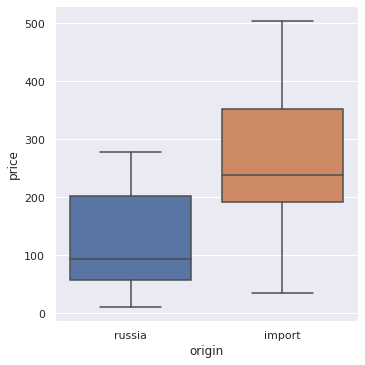

In [209]:
sns.set_theme(style="darkgrid")
g = sns.catplot(x="origin", y="price", data=shops, kind="box")

In [210]:
model = smf.ols('price ~ origin', data=shops).fit()
model.summary() if str(input()) == "1" else print(model.summary())

2
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     6.650
Date:                Tue, 10 Nov 2020   Prob (F-statistic):             0.0189
Time:                        18:48:03   Log-Likelihood:                -122.90
No. Observations:                  20   AIC:                             249.8
Df Residuals:                      18   BIC:                             251.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          261.3700     37.619

In [211]:
aov_table = sm.stats.anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
origin,1.0,94106.852405,94106.852405,6.649892,0.018926
Residual,18.0,254729.450490,14151.636138,NaN,NaN


In [212]:
model_2 = smf.ols('price ~ origin + store', data=shops).fit()
model_2.summary() if str(input()) == "1" else print(model_2.summary())

2
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     3.278
Date:                Tue, 10 Nov 2020   Prob (F-statistic):             0.0625
Time:                        18:48:04   Log-Likelihood:                -122.78
No. Observations:                  20   AIC:                             251.6
Df Residuals:                      17   BIC:                             254.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              273.578

In [213]:
aov_table_2 = sm.stats.anova_lm(model_2)
aov_table_2

,df,sum_sq,mean_sq,F,PR(>F)
origin,1.0,94106.852405,94106.852405,6.354820,0.021987
store,1.0,2980.949445,2980.949445,0.201297,0.659342
Residual,17.0,251748.501045,14808.735356,NaN,NaN


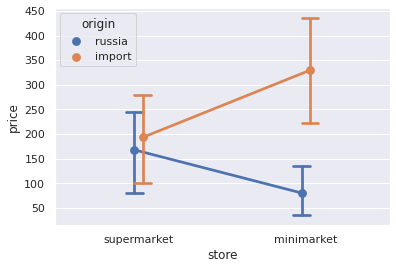

In [214]:
sns.set_theme(style="darkgrid")
ax = sns.pointplot(x="store", y="price", hue="origin", data=shops, join=True, capsize=.1, dodge=True)

In [215]:
model_3 = smf.ols('price ~ origin + store + origin:store', data=shops).fit() # same result: 'price ~ origin * store' 
model_3.summary() if str(input()) == "1" else print(model_3.summary())

2
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     4.512
Date:                Tue, 10 Nov 2020   Prob (F-statistic):             0.0178
Time:                        18:48:05   Log-Likelihood:                -119.91
No. Observations:                  20   AIC:                             247.8
Df Residuals:                      16   BIC:                             251.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [216]:
aov_table_3 = sm.stats.anova_lm(model_3)
aov_table_3

,df,sum_sq,mean_sq,F,PR(>F)
origin,1.0,94106.852405,94106.852405,7.967925,0.012252
store,1.0,2980.949445,2980.949445,0.252394,0.622238
origin:store,1.0,62777.133005,62777.133005,5.315272,0.034867
Residual,16.0,188971.368040,11810.710503,NaN,NaN


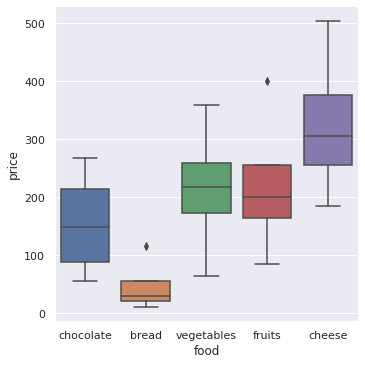

In [217]:
sns.set_theme(style="darkgrid")
g = sns.catplot(x=shops.index, y="price", data=shops, kind="box")

In [218]:
model_4 = smf.ols('price ~ shops.index', data=shops).fit() 
model_4.summary() if str(input()) == "1" else print(model_4.summary())

2
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     3.398
Date:                Tue, 10 Nov 2020   Prob (F-statistic):             0.0362
Time:                        18:48:05   Log-Likelihood:                -119.59
No. Observations:                  20   AIC:                             249.2
Df Residuals:                      15   BIC:                             254.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept           

In [219]:
aov_table_4 = sm.stats.anova_lm(model_4)
aov_table_4

,df,sum_sq,mean_sq,F,PR(>F)
shops.index,4.0,165823.396270,41455.849068,3.397781,0.036175
Residual,15.0,183012.906625,12200.860442,NaN,NaN


In [220]:
# Не работает. По причине того, что индекс имеет текстовый формат. Пришлось перезагружать датасет с другим индексом.
# tukey_test_result = sm.stats.multicomp.pairwise_tukeyhsd(endog=shops.index.unique(), groups="price")

In [221]:
DATA = "~/PycharmProjects/Datasets/"
shops_path = DATA + "shops.csv"
shops_2 = pd.read_csv(shops_path)
shops_2.head()

,food,price,store,origin
0,chocolate,100.30,supermarket,russia
1,chocolate,55.57,minimarket,russia
2,chocolate,268.62,minimarket,import
3,chocolate,196.81,supermarket,import
4,bread,10.91,minimarket,russia


In [222]:
tukey_test_result_shops = sm.stats.multicomp.pairwise_tukeyhsd(endog=shops_2["price"], groups=shops_2["food"])
print(tukey_test_result_shops)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
  group1    group2    meandiff p-adj    lower    upper   reject
---------------------------------------------------------------
    bread     cheese  278.0525 0.0204   36.8408 519.2642   True
    bread  chocolate    108.22 0.6312 -132.9917 349.4317  False
    bread     fruits  174.3125  0.221  -66.8992 415.5242  False
    bread vegetables  167.7625 0.2513  -73.4492 408.9742  False
   cheese  chocolate -169.8325 0.2414 -411.0442  71.3792  False
   cheese     fruits   -103.74 0.6616 -344.9517 137.4717  False
   cheese vegetables   -110.29 0.6172 -351.5017 130.9217  False
chocolate     fruits   66.0925    0.9 -175.1192 307.3042  False
chocolate vegetables   59.5425    0.9 -181.6692 300.7542  False
   fruits vegetables     -6.55    0.9 -247.7617 234.6617  False
---------------------------------------------------------------


In [223]:
# tukey_test_result_shops

### NEW DATASET

In [224]:
DATA = "~/PycharmProjects/Datasets/"
npk_path = DATA + "npk.csv"
npk = pd.read_csv(npk_path, index_col=0)
npk = npk.rename(columns={"yield" : "growth"})
npk.head()

,block,N,P,K,growth
1,1,0,1,1,49.5
2,1,1,1,0,62.8
3,1,0,0,0,46.8
4,1,1,0,1,57.0
5,2,1,0,0,59.8


In [225]:
model_npk = smf.ols('growth ~ N * P', data=npk).fit()
model_npk.summary() if str(input()) == "1" else print(model_npk.summary())

2
                            OLS Regression Results                            
Dep. Variable:                 growth   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     2.221
Date:                Tue, 10 Nov 2020   Prob (F-statistic):              0.117
Time:                        18:48:06   Log-Likelihood:                -73.777
No. Observations:                  24   AIC:                             155.6
Df Residuals:                      20   BIC:                             160.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     51.7167      2.341     22.096      0

In [226]:
aov_table_npk = sm.stats.anova_lm(model_npk)
aov_table_npk.unstack()["PR(>F)"]["N:P"]

0.4304878274077424

In [227]:
# # Предполагается, что Вы уже скачали необходимый датасет и знаете путь до него
# import pandas as pd
# import statsmodels.api as sm
# import statsmodels.formula.api as smf

# DATA = "~/PycharmProjects/Datasets/"
# npk_path = DATA + "npk.csv"
# npk = pd.read_csv(npk_path, index_col=0)
# npk = npk.rename(columns={"yield" : "growth"}) # Пришлось переименовать столбец, иначе функция из библиотеки statsmodels.formula.api "спотыкается" о формулу
# model_npk = smf.ols('growth ~ N * P', data=npk).fit()
# aov_table_npk = sm.stats.anova_lm(model_npk)
# aov_table_npk.unstack()["PR(>F)"]["N:P"]

In [228]:
model_npk_2 = smf.ols('growth ~ N + P + K', data=npk).fit()
model_npk_2.summary() if str(input()) == "1" else print(model_npk_2.summary())

2
                            OLS Regression Results                            
Dep. Variable:                 growth   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     3.346
Date:                Tue, 10 Nov 2020   Prob (F-statistic):             0.0397
Time:                        18:48:07   Log-Likelihood:                -72.346
No. Observations:                  24   AIC:                             152.7
Df Residuals:                      20   BIC:                             157.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     54.6500      2.205     24.784      0

In [229]:
aov_table_npk_2 = sm.stats.anova_lm(model_npk_2)
aov_table_npk_2.unstack()["PR(>F)"]

N           0.019193
P           0.597434
K           0.085921
Residual         NaN
dtype: float64

In [230]:
# # Предполагается, что Вы уже скачали необходимый датасет и знаете путь до него
# import pandas as pd
# import statsmodels.api as sm
# import statsmodels.formula.api as smf

# DATA = "~/PycharmProjects/Datasets/"
# npk_path = DATA + "npk.csv"
# npk = pd.read_csv(npk_path, index_col=0)
# npk = npk.rename(columns={"yield" : "growth"})
# model_npk_2 = smf.ols('growth ~ N + P + K', data=npk).fit()
# aov_table_npk_2 = sm.stats.anova_lm(model_npk_2)
# aov_table_npk_2.unstack()["PR(>F)"]

### NEW DATASET

In [231]:
DATA = "~/PycharmProjects/Datasets/"
therapy_path = DATA + "therapy_data.csv"
therapy = pd.read_csv(therapy_path)
therapy.head()

,subject,sex,therapy,price,well_being
0,1,female,therapy1,low,54.290999
1,1,female,therapy2,low,62.558225
2,1,female,placebo,low,28.139338
3,2,female,therapy1,low,35.903914
4,2,female,therapy2,low,28.129274


In [232]:
model_therapy = smf.ols('well_being ~ therapy', data=therapy).fit()
model_therapy.summary() if str(input()) == "1" else print(model_therapy.summary())

2
                            OLS Regression Results                            
Dep. Variable:             well_being   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                 -0.023
Method:                 Least Squares   F-statistic:                    0.6681
Date:                Tue, 10 Nov 2020   Prob (F-statistic):              0.521
Time:                        18:48:07   Log-Likelihood:                -127.49
No. Observations:                  30   AIC:                             261.0
Df Residuals:                      27   BIC:                             265.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              46.2584  

In [233]:
aov_table_therapy = sm.stats.anova_lm(model_therapy)
aov_table_therapy

,df,sum_sq,mean_sq,F,PR(>F)
therapy,2.0,426.836426,213.418213,0.668099,0.520954
Residual,27.0,8624.909767,319.441102,NaN,NaN


#### Оказывается, что на данный момент в statsmodels не реализована ANOVA с повторными наблюдениями! 

https://www.statsmodels.org/stable/generated/statsmodels.stats.anova.AnovaRM.html#statsmodels.stats.anova.AnovaRM

Точнее класс-то есть, а реализации нет. Обидно до слёз! (нет)

Придётся использовать что-то другое, либо извращаться с имеющимися формулами.

In [234]:
# Не тот тип взаимодействия
model_therapy_2 = smf.ols('well_being ~ therapy + subject:therapy', data=therapy).fit() 
model_therapy_2.summary() if str(input()) == "1" else print(model_therapy_2.summary())

2
                            OLS Regression Results                            
Dep. Variable:             well_being   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                 -0.121
Method:                 Least Squares   F-statistic:                    0.3744
Date:                Tue, 10 Nov 2020   Prob (F-statistic):              0.861
Time:                        18:48:08   Log-Likelihood:                -127.08
No. Observations:                  30   AIC:                             266.2
Df Residuals:                      24   BIC:                             274.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept           

Вариант-затычка из statsmodels:

In [235]:
# Уже ближе к правде, но всё равно не совсем то. 
# model_therapy_2 = smf.ols('well_being ~ therapy + C(subject)*C(therapy)', data=therapy).fit() 
# aov_table_therapy_2 = sm.stats.anova_lm(model_therapy_2)
# aov_table_therapy_2 

In [236]:
# Совсем не то!
# model_therapy_2 = smf.ols('well_being ~ subject*therapy', data=therapy).fit() 
# aov_table_therapy_2 = sm.stats.anova_lm(model_therapy_2)
# aov_table_therapy_2 

In [237]:
# АГА, ПОЛУЧИЛОСЬ! 
model_therapy_2 = smf.ols('well_being ~ C(subject)*C(therapy)', data=therapy).fit() 
aov_table_therapy_2 = sm.stats.anova_lm(model_therapy_2)
aov_table_therapy_2 

,df,sum_sq,mean_sq,F,PR(>F)
C(subject),4.0,860.022241,215.005560,0.644426,0.639228
C(therapy),2.0,426.836426,213.418213,0.639668,0.541264
C(subject):C(therapy),8.0,2760.304655,345.038082,1.034166,0.453545
Residual,15.0,5004.582870,333.638858,NaN,NaN


В данном случае учитывается ошибка, связанная с испытуемым, а именно то, что каждая терапия проводилась с КАЖДЫМ испытуемым (каждый испытуемый проходил все 3 вида психотерапии).

Не стоит путать формулы! Необходимо обратить внимание, что формулы разные!

### Методом научного тыка и с помощью игр с формулами удалось добиться нужного результата! 
Решительная победа! 

#### А почему бы не попробовать пакет, в котором реализована ANOVA с повторными измерениями? 
Беглый гуглинг помог найти вот такое вот: 
- https://stackoverflow.com/questions/56744225/which-statsmodels-anova-model-for-within-and-between-subjects-design
-https://stackoverflow.com/questions/22534836/two-way-repeated-measures-anova-python-function

Ну, раз уж рекомендуют, то почему бы не попробовать? 
- https://pypi.org/project/pingouin/
- https://pingouin-stats.org/index.html

In [238]:
# therapy.head()

In [239]:
# import pingouin as pg

# aov_1 = pg.rm_anova(dv='well_being', within=['therapy', 'price'], subject="subject", data=therapy, detailed=True)
# aov_2 = pg.rm_anova(dv='well_being', within=['therapy', 'subject'], subject="sex", data=therapy, detailed=True)
# aov_3 = pg.rm_anova(dv='well_being', within=['price', 'subject'], subject="sex", data=therapy, detailed=True)
# aov_4 = pg.rm_anova(dv='well_being', within=['price', 'sex'], subject="subject", data=therapy, detailed=True)
# Не работает с 3+ переменными. Прикольно. 
# Значит, использовать эту штуку незачем, хотя и работает неплохо с 2-мя переменными.

In [240]:
# pd.concat([aov_1, aov_2, aov_3, aov_4])

In [241]:
# import statsmodels

# print(statsmodels.stats.anova.AnovaRM(therapy, 'well_being', "subject", within=['therapy', 'price']).fit())

Да уж, работает всё это дело непойми как. Печально, видимо всё же придётся использовать R.

### Вывод - пакет pingouin потенциально интересный, надо бы с ним поиграться и посмотреть на результаты. 

### Но пока что statsmodels хватает для исследований, несмотря на отсутствие некоторых фич.

In [242]:
model_therapy_3 = smf.ols('well_being ~ therapy * price', data=therapy).fit() 
aov_table_therapy_3 = sm.stats.anova_lm(model_therapy_3)
aov_table_therapy_3 

,df,sum_sq,mean_sq,F,PR(>F)
therapy,2.0,426.836426,213.418213,0.743083,0.486274
price,1.0,1674.794896,1674.794896,5.831325,0.023727
therapy:price,2.0,57.156802,28.578401,0.099505,0.905657
Residual,24.0,6892.958069,287.206586,NaN,NaN


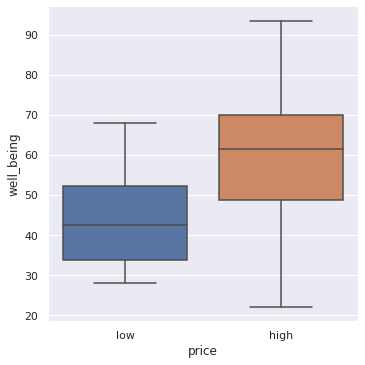

In [243]:
sns.set_theme(style="darkgrid")
g = sns.catplot(x="price", y="well_being", data=therapy, kind="box")

Больше платишь - лучше самочувствие, лол.

А теперь учтём дисперсию, связанную с испытуемым!

In [244]:
# Отлично, работает!
model_therapy_4 = smf.ols('well_being ~ C(subject)*C(price) + C(therapy)*C(price) + C(subject)*C(therapy)', 
                          data=therapy).fit() 
aov_table_therapy_4 = sm.stats.anova_lm(model_therapy_4)
aov_table_therapy_4 

,df,sum_sq,mean_sq,F,PR(>F)
C(subject),4.0,860.022241,215.005560,0.758459,0.580280
C(price),1.0,1674.794896,1674.794896,5.908051,0.041161
C(therapy),2.0,426.836426,213.418213,0.752860,0.501672
C(subject):C(price),4.0,1004.817576,251.204394,0.886155,0.513789
C(therapy):C(price),2.0,57.156802,28.578401,0.100814,0.905232
C(subject):C(therapy),8.0,2760.304655,345.038082,1.217166,0.393892
Residual,8.0,2267.813597,283.476700,NaN,NaN


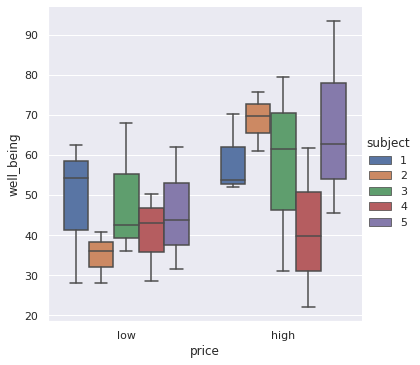

In [245]:
# Красиво, но неинформативно
sns.set_theme(style="darkgrid")
g = sns.catplot(x="price", y="well_being", hue="subject", data=therapy, kind="box")

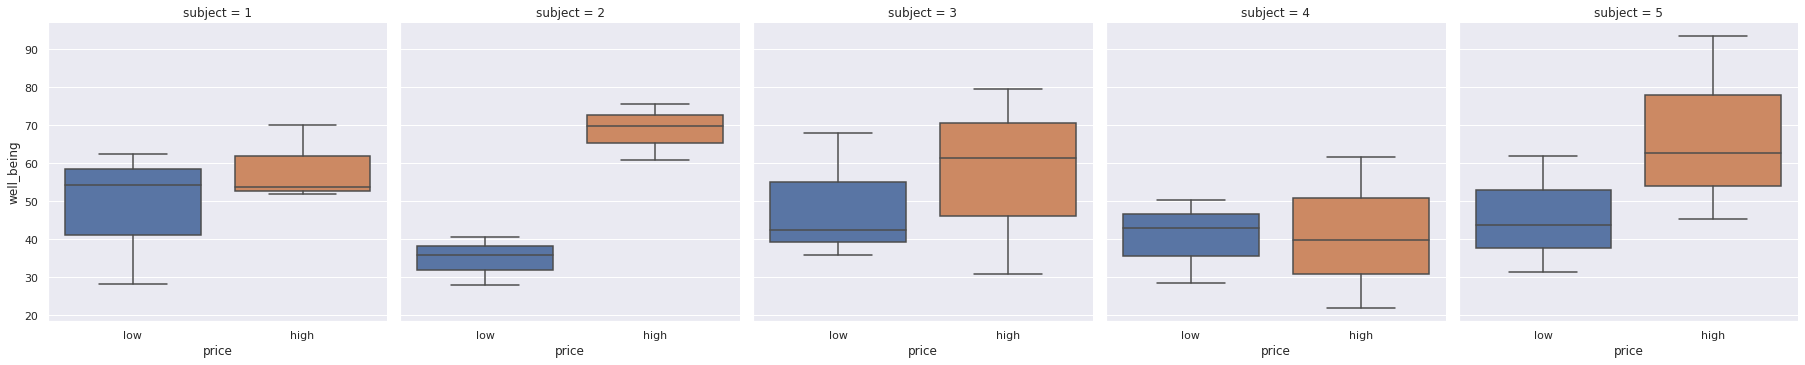

In [246]:
# А вот так намного лучше!
sns.set_theme(style="darkgrid")
g = sns.catplot(x="price", y="well_being", col="subject", data=therapy, kind="box")

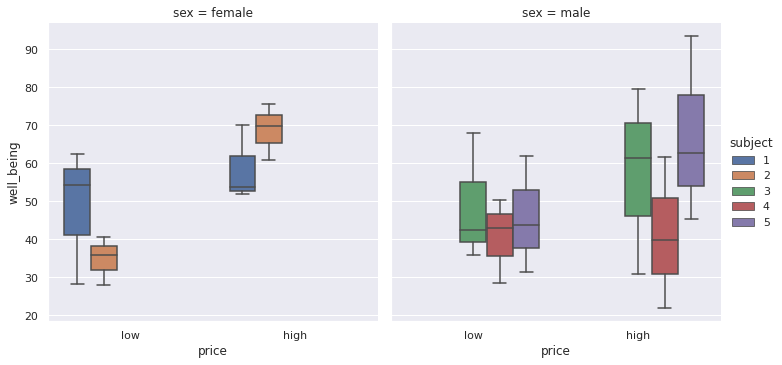

In [247]:
sns.set_theme(style="darkgrid")
g = sns.catplot(x="price", y="well_being", col="sex", hue="subject", data=therapy, kind="box")

In [248]:
model_therapy_5 = smf.ols('well_being ~ therapy * price * sex', data=therapy).fit() 
aov_table_therapy_5 = sm.stats.anova_lm(model_therapy_5)
aov_table_therapy_5 

,df,sum_sq,mean_sq,F,PR(>F)
therapy,2.0,426.836426,213.418213,0.608842,0.554809
price,1.0,1674.794896,1674.794896,4.777874,0.042284
sex,1.0,45.817191,45.817191,0.130708,0.721908
therapy:price,2.0,57.156802,28.578401,0.081529,0.922045
therapy:sex,2.0,70.112269,35.056134,0.100009,0.905329
price:sex,1.0,255.306083,255.306083,0.728340,0.404636
therapy:price:sex,2.0,212.157145,106.078573,0.302622,0.742564
Residual,18.0,6309.565381,350.531410,NaN,NaN


In [249]:
# model_therapy_6 = smf.ols('well_being ~ C(sex)*C(therapy)*C(price)', 
#                           data=therapy).fit() # Почти то, что нужно!
model_therapy_6 = smf.ols('well_being ~ (sex*price*therapy)', 
                          data=therapy).fit() 
aov_table_therapy_6 = sm.stats.anova_lm(model_therapy_6)
aov_table_therapy_6
# Пока всё ещё не получилось

,df,sum_sq,mean_sq,F,PR(>F)
sex,1.0,45.817191,45.817191,0.130708,0.721908
price,1.0,1674.794896,1674.794896,4.777874,0.042284
therapy,2.0,426.836426,213.418213,0.608842,0.554809
sex:price,1.0,255.306083,255.306083,0.728340,0.404636
sex:therapy,2.0,70.112269,35.056134,0.100009,0.905329
price:therapy,2.0,57.156802,28.578401,0.081529,0.922045
sex:price:therapy,2.0,212.157145,106.078573,0.302622,0.742564
Residual,18.0,6309.565381,350.531410,NaN,NaN


In [250]:
therapy.head()

,subject,sex,therapy,price,well_being
0,1,female,therapy1,low,54.290999
1,1,female,therapy2,low,62.558225
2,1,female,placebo,low,28.139338
3,2,female,therapy1,low,35.903914
4,2,female,therapy2,low,28.129274


In [251]:
# А может вот это сработает?
import pingouin as pg

# aov = pg.rm_anova(dv='well_being', within=['therapy', 'subject'], data=therapy, detailed=True)
# aov

### NEW DATASET

In [252]:
DATA = "~/PycharmProjects/Datasets/"
pills_path = DATA + "Pillulkin.csv"
pills = pd.read_csv(pills_path)
pills.head()

,temperature,pill,doctor,patient
0,39.330552,A,Aibolit,1
1,40.748766,B,Aibolit,1
2,39.339130,A,Aibolit,2
3,38.204377,B,Aibolit,2
4,36.997569,A,Aibolit,3


In [253]:
model_pills = smf.ols('temperature ~ C(pill)*C(patient)', data=pills).fit() 
aov_table_pills = sm.stats.anova_lm(model_pills)
aov_table_pills

,df,sum_sq,mean_sq,F,PR(>F)
C(pill),1.0,0.132983,0.132983,0.030394,0.863351
C(patient),9.0,42.817741,4.757527,1.087370,0.413670
C(pill):C(patient),9.0,23.479432,2.608826,0.596268,0.785245
Residual,20.0,87.505176,4.375259,NaN,NaN


In [254]:
model_pills_2 = smf.ols('temperature ~ C(pill)*C(patient) + C(pill)*C(doctor) + C(patient)*C(doctor)', data=pills).fit() 
aov_table_pills_2 = sm.stats.anova_lm(model_pills_2)
aov_table_pills_2.loc[["C(pill):C(doctor)"], "F"]

C(pill):C(doctor)    0.145831
Name: F, dtype: float64

In [255]:
# import pandas as pd
# import statsmodels.api as sm
# import statsmodels.formula.api as smf

# pills = pd.read_csv("https://stepic.org/media/attachments/lesson/11505/Pillulkin.csv")
# model_pills = smf.ols('temperature ~ C(pill)*C(patient)', data=pills).fit() 
# aov_table_pills = sm.stats.anova_lm(model_pills)
# print(aov_table_pills["PR(>F)"])

In [256]:
# import pandas as pd
# import statsmodels.api as sm
# import statsmodels.formula.api as smf

# pills = pd.read_csv("https://stepic.org/media/attachments/lesson/11505/Pillulkin.csv")
# model_pills = smf.ols('temperature ~ C(pill)*C(patient) + C(pill)*C(doctor) + C(patient)*C(doctor)', data=pills).fit() 
# aov_table_pills = sm.stats.anova_lm(model_pills)
# aov_table_pills.loc[["C(pill):C(doctor)"], "F"]